In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder , RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
Air_df=pd.read_excel("Data_Train.xlsx")

In [3]:
Air_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
Air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
Air_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
Air_df.duplicated().sum()

220

In [7]:
Air_df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [8]:
Air_df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [9]:
Air_df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

#### Feature Engineering

In [10]:
Air_df['Date_of_Journey'] = pd.to_datetime(Air_df['Date_of_Journey'], errors='coerce')


In [11]:
Air_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [12]:
Air_df['Year_of_Journey'] = Air_df['Date_of_Journey'].dt.year
Air_df['Month_of_Journey'] = Air_df['Date_of_Journey'].dt.month
Air_df['Day_of_Journey'] = Air_df['Date_of_Journey'].dt.day
Air_df['Dep_Hour']= Air_df['Dep_Time'].apply(lambda x:x.split(':')[0])
Air_df['Dep_Min']= Air_df['Dep_Time'].apply(lambda x:x.split(':')[1])
Air_df['Arrival_Hour']= Air_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
Air_df['Arrival_Min']= Air_df['Arrival_Time'].apply(lambda x:x.strip(':')[3:5])

In [13]:
Air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10683 non-null  object        
 1   Date_of_Journey   10683 non-null  datetime64[ns]
 2   Source            10683 non-null  object        
 3   Destination       10683 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10683 non-null  object        
 6   Arrival_Time      10683 non-null  object        
 7   Duration          10683 non-null  object        
 8   Total_Stops       10682 non-null  object        
 9   Additional_Info   10683 non-null  object        
 10  Price             10683 non-null  int64         
 11  Year_of_Journey   10683 non-null  int64         
 12  Month_of_Journey  10683 non-null  int64         
 13  Day_of_Journey    10683 non-null  int64         
 14  Dep_Hour          1068

In [14]:
Air_df['Arrival_Hour']= Air_df['Arrival_Hour'].astype(int)
Air_df['Arrival_Min']= Air_df['Arrival_Min'].astype(int)
Air_df['Dep_Hour']= Air_df['Dep_Hour'].astype(int)
Air_df['Dep_Min']= Air_df['Dep_Min'].astype(int)

In [15]:
Air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10683 non-null  object        
 1   Date_of_Journey   10683 non-null  datetime64[ns]
 2   Source            10683 non-null  object        
 3   Destination       10683 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10683 non-null  object        
 6   Arrival_Time      10683 non-null  object        
 7   Duration          10683 non-null  object        
 8   Total_Stops       10682 non-null  object        
 9   Additional_Info   10683 non-null  object        
 10  Price             10683 non-null  int64         
 11  Year_of_Journey   10683 non-null  int64         
 12  Month_of_Journey  10683 non-null  int64         
 13  Day_of_Journey    10683 non-null  int64         
 14  Dep_Hour          1068

In [16]:
 Air_df.drop(['Date_of_Journey','Dep_Time', 'Arrival_Time','Route'], axis = 1,inplace=True)

In [17]:
Air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Duration          10683 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   Year_of_Journey   10683 non-null  int64 
 8   Month_of_Journey  10683 non-null  int64 
 9   Day_of_Journey    10683 non-null  int64 
 10  Dep_Hour          10683 non-null  int64 
 11  Dep_Min           10683 non-null  int64 
 12  Arrival_Hour      10683 non-null  int64 
 13  Arrival_Min       10683 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [18]:
 Air_df.duplicated().sum()

222

In [19]:
 Air_df.drop_duplicates(inplace = True)

In [20]:
 Air_df.duplicated().sum()

0

In [21]:
 Air_df.isnull().sum() /  Air_df.shape[0] *100

Airline             0.000000
Source              0.000000
Destination         0.000000
Duration            0.000000
Total_Stops         0.009559
Additional_Info     0.000000
Price               0.000000
Year_of_Journey     0.000000
Month_of_Journey    0.000000
Day_of_Journey      0.000000
Dep_Hour            0.000000
Dep_Min             0.000000
Arrival_Hour        0.000000
Arrival_Min         0.000000
dtype: float64

In [22]:
 Air_df[Air_df['Total_Stops'].isnull()]

Airline Source Destination Duration Total_Stops Additional_Info  \
9039  Air India  Delhi      Cochin  23h 40m         NaN         No info   

      Price  Year_of_Journey  Month_of_Journey  Day_of_Journey  Dep_Hour  \
9039   7480             2019                 6               5         9   

      Dep_Min  Arrival_Hour  Arrival_Min  
9039       45             9           25

In [23]:
Air_df["Total_Stops"]=Air_df["Total_Stops"].fillna(0)

In [24]:
Air_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', 0, '4 stops'],
      dtype=object)

In [25]:
Air_df["Total_Stops"] = Air_df["Total_Stops"].replace({'non-stop': '00','1 stop':'1','2 stops':'2','3 stops':'3','4 stops':'4'})
Air_df["Total_Stops"].unique()

array(['00', '2', '1', '3', 0, '4'], dtype=object)

In [26]:
Air_df["Total_Stops"]= Air_df["Total_Stops"].astype(int)


In [27]:
Air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10461 non-null  object
 1   Source            10461 non-null  object
 2   Destination       10461 non-null  object
 3   Duration          10461 non-null  object
 4   Total_Stops       10461 non-null  int64 
 5   Additional_Info   10461 non-null  object
 6   Price             10461 non-null  int64 
 7   Year_of_Journey   10461 non-null  int64 
 8   Month_of_Journey  10461 non-null  int64 
 9   Day_of_Journey    10461 non-null  int64 
 10  Dep_Hour          10461 non-null  int64 
 11  Dep_Min           10461 non-null  int64 
 12  Arrival_Hour      10461 non-null  int64 
 13  Arrival_Min       10461 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.2+ MB


In [28]:
Air_df.head()

Airline    Source Destination Duration  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi   2h 50m            0         No info   
1    Air India   Kolkata    Banglore   7h 25m            2         No info   
2  Jet Airways     Delhi      Cochin      19h            2         No info   
3       IndiGo   Kolkata    Banglore   5h 25m            1         No info   
4       IndiGo  Banglore   New Delhi   4h 45m            1         No info   

   Price  Year_of_Journey  Month_of_Journey  Day_of_Journey  Dep_Hour  \
0   3897             2019                 3              24        22   
1   7662             2019                 1               5         5   
2  13882             2019                 9               6         9   
3   6218             2019                12               5        18   
4  13302             2019                 1               3        16   

   Dep_Min  Arrival_Hour  Arrival_Min  
0       20             1           10  
1       50            13           15  
2       25             4           25  
3        5            23           30  
4       50            21           35

In [29]:
Air_df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [30]:
Air_df['Duration_Hour']= Air_df['Duration'].str.split('h').str[0]
Air_df['Duration_Hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [31]:
Air_df[Air_df['Duration']=='5m']

Airline  Source Destination Duration  Total_Stops Additional_Info  \
6474  Air India  Mumbai   Hyderabad       5m            2         No info   

      Price  Year_of_Journey  Month_of_Journey  Day_of_Journey  Dep_Hour  \
6474  17327             2019                 6               3        16   

      Dep_Min  Arrival_Hour  Arrival_Min Duration_Hour  
6474       50            16           55            5m

In [32]:
Air_df.drop(6474, axis=0, inplace=True)

In [33]:
Air_df['Duration_Minut']= Air_df['Duration'].str.split('h').str[1].str.split('m').str[0]
Air_df['Duration_Minut'].unique()

array([' 50', ' 25', '', ' 45', ' 30', ' 5', ' 15', ' 35', ' 10', ' 20',
       ' 55', ' 40'], dtype=object)

In [34]:
Air_df['Duration_Minut'] = Air_df['Duration_Minut'].replace({'': '0'})


In [35]:
Air_df['Duration_Hour']= Air_df['Duration_Hour'].astype(int)
Air_df['Duration_Minut']= Air_df['Duration_Minut'].astype(int)

In [36]:
Air_df.drop('Duration',axis = 1,inplace=True)

In [37]:
Air_df['Duration_by_minute'] = (Air_df['Duration_Hour'] * 60 )+Air_df['Duration_Minut']
Air_df['Duration_by_minute']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_by_minute, Length: 10460, dtype: int64

In [38]:
Air_df['Duration_by_minute']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_by_minute, Length: 10460, dtype: int64

In [39]:
Air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10460 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10460 non-null  object
 1   Source              10460 non-null  object
 2   Destination         10460 non-null  object
 3   Total_Stops         10460 non-null  int64 
 4   Additional_Info     10460 non-null  object
 5   Price               10460 non-null  int64 
 6   Year_of_Journey     10460 non-null  int64 
 7   Month_of_Journey    10460 non-null  int64 
 8   Day_of_Journey      10460 non-null  int64 
 9   Dep_Hour            10460 non-null  int64 
 10  Dep_Min             10460 non-null  int64 
 11  Arrival_Hour        10460 non-null  int64 
 12  Arrival_Min         10460 non-null  int64 
 13  Duration_Hour       10460 non-null  int64 
 14  Duration_Minut      10460 non-null  int64 
 15  Duration_by_minute  10460 non-null  int64 
dtypes: int64(12), object(4

In [40]:
Air_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [41]:
Air_df.duplicated().sum()

0

In [42]:
Air_df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648])

### Visualization

In [43]:
#### Univariate analysis

In [44]:
px.histogram(data_frame=Air_df , x = "Airline")

In [45]:
######################################################


In [46]:
px.histogram(data_frame=Air_df , x = "Source")

In [47]:
########################################

In [48]:
px.histogram(data_frame=Air_df, x ="Destination")

In [49]:
########################################

In [50]:
px.histogram(data_frame=Air_df , x = "Total_Stops")

<AxesSubplot:xlabel='Month_of_Journey', ylabel='count'>

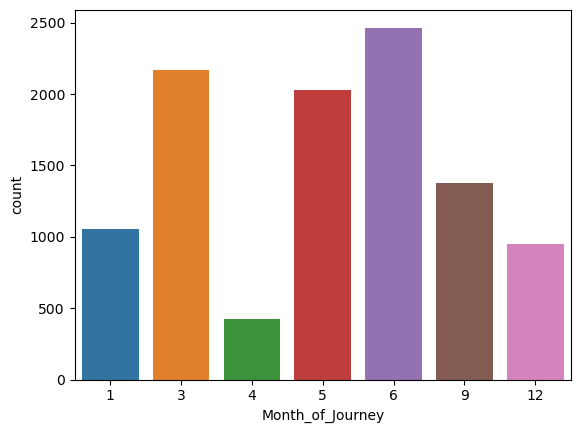

In [51]:
sns.countplot(x='Month_of_Journey', data=Air_df)


In [52]:
########################################################

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

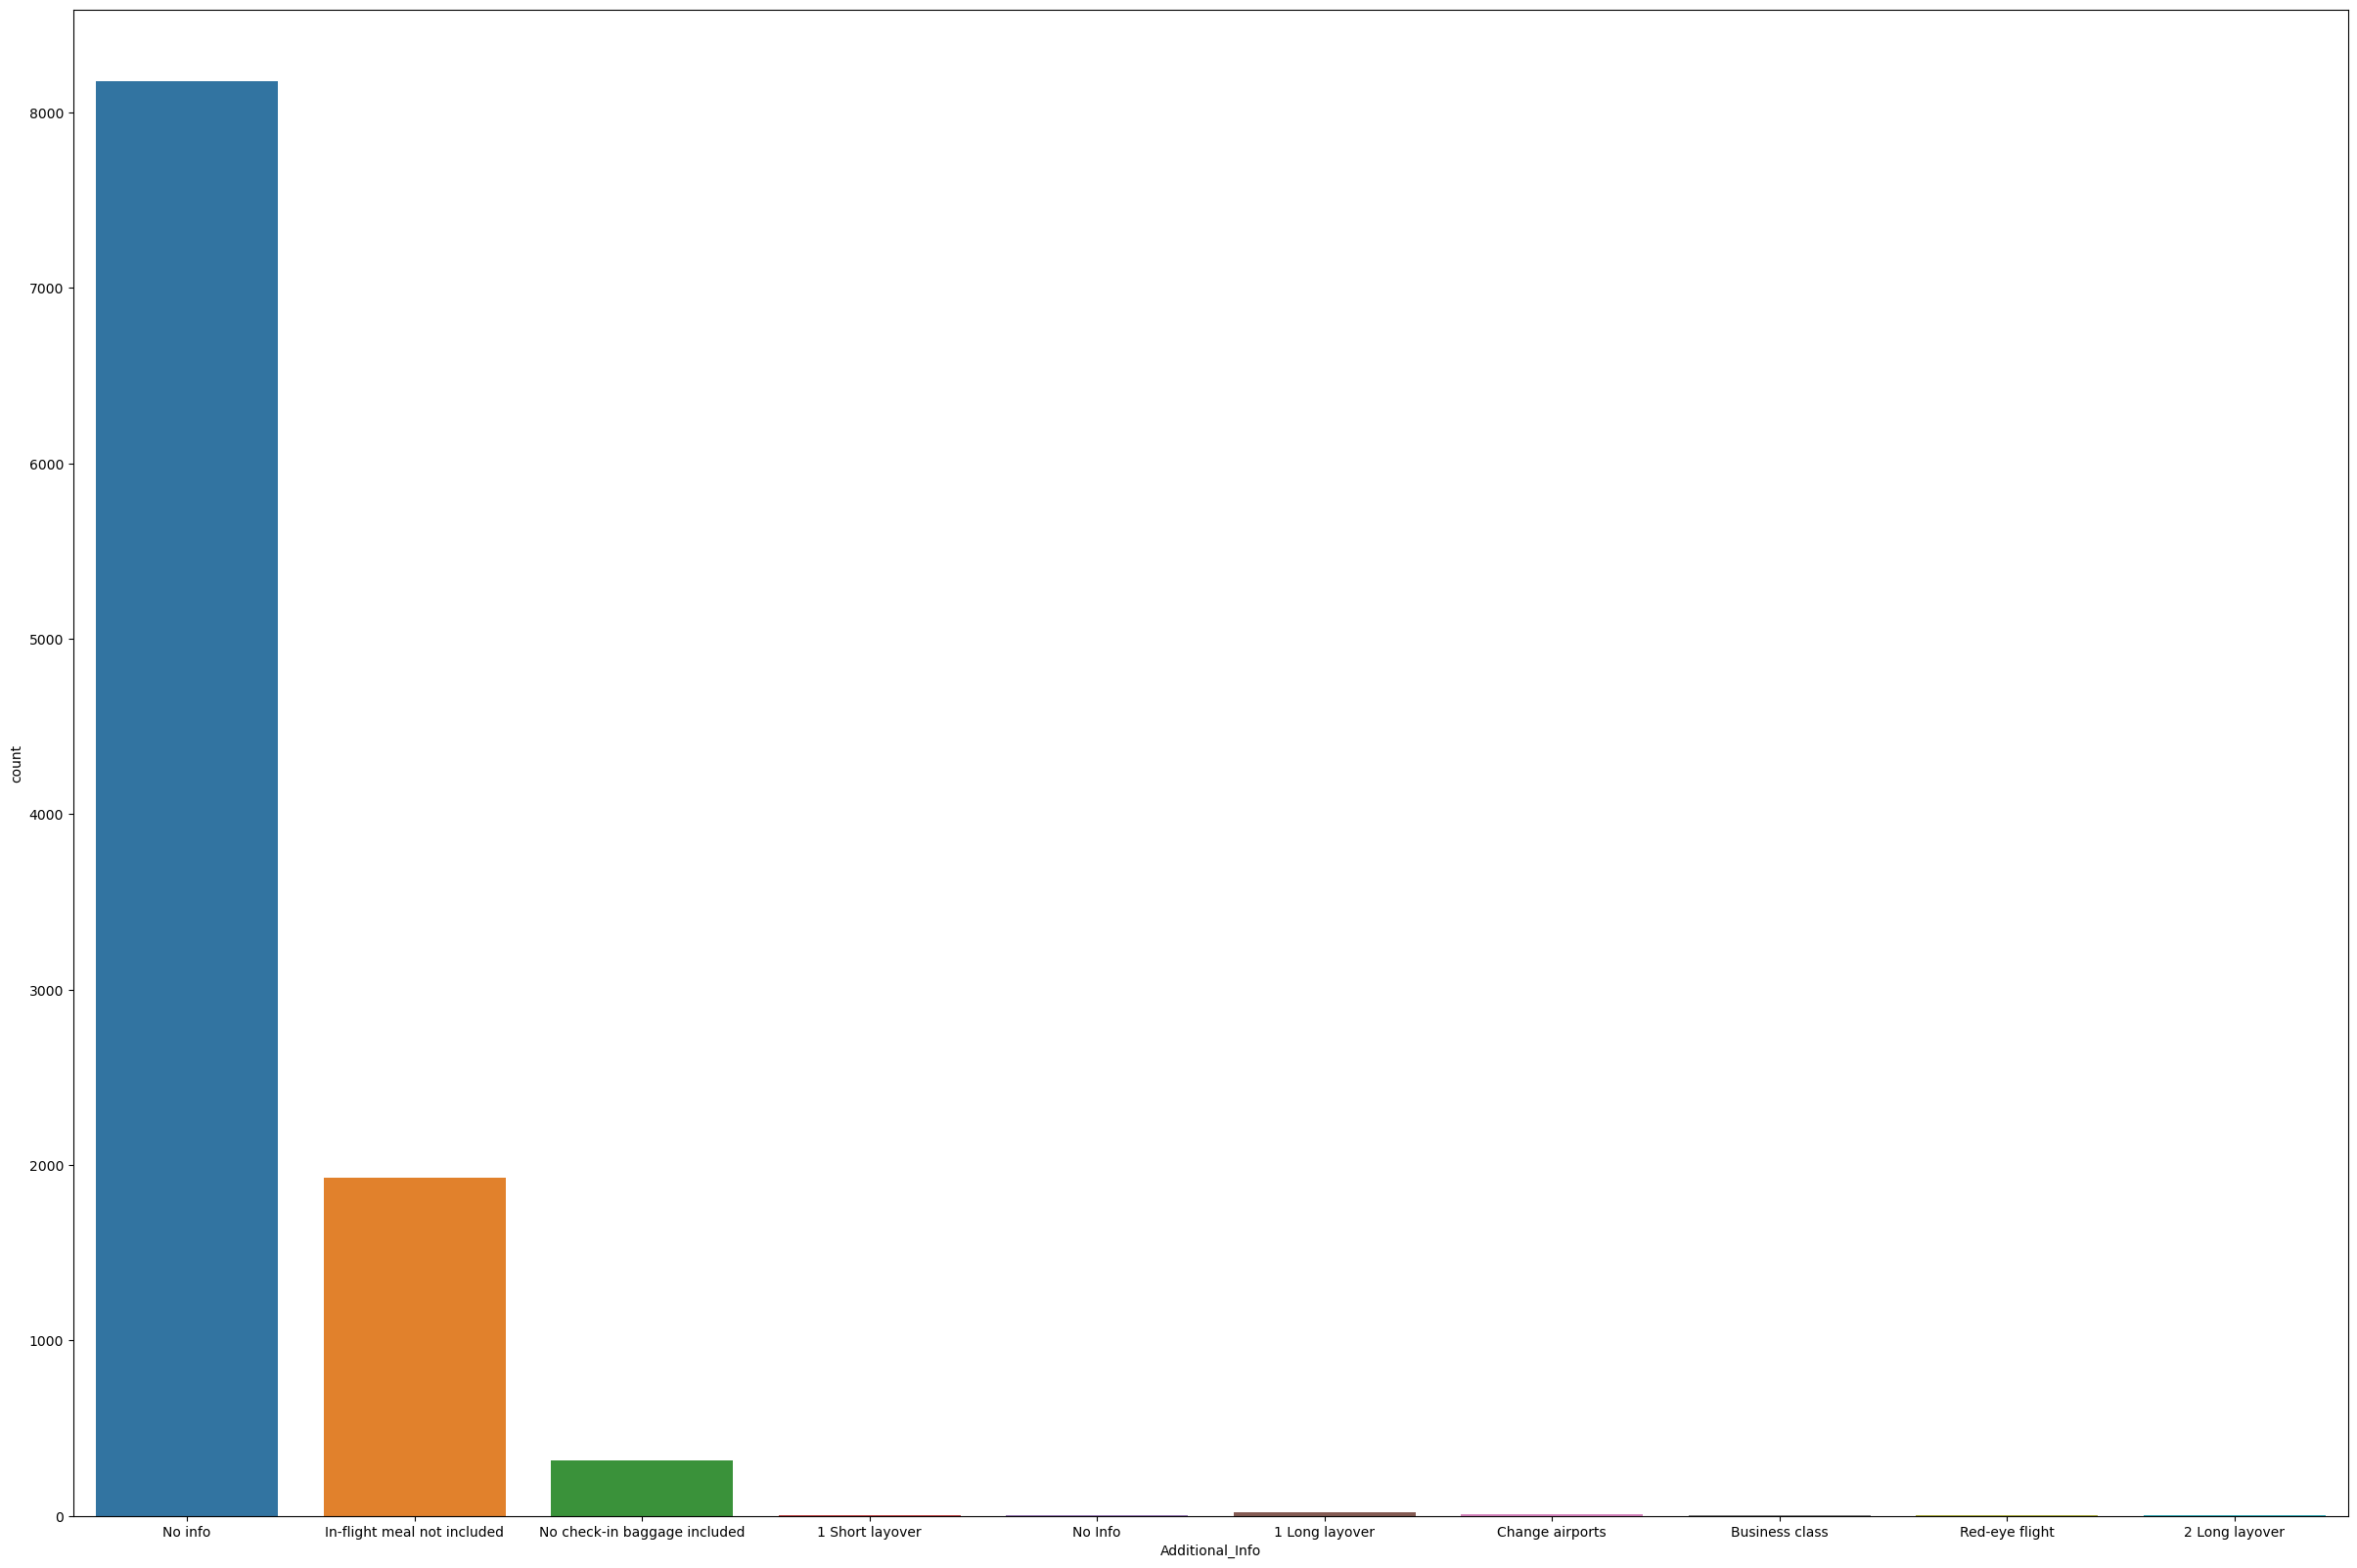

In [53]:
plt.figure(figsize=(30,20))
sns.countplot(x='Additional_Info', data=Air_df)

In [54]:
## Biovariate analysis

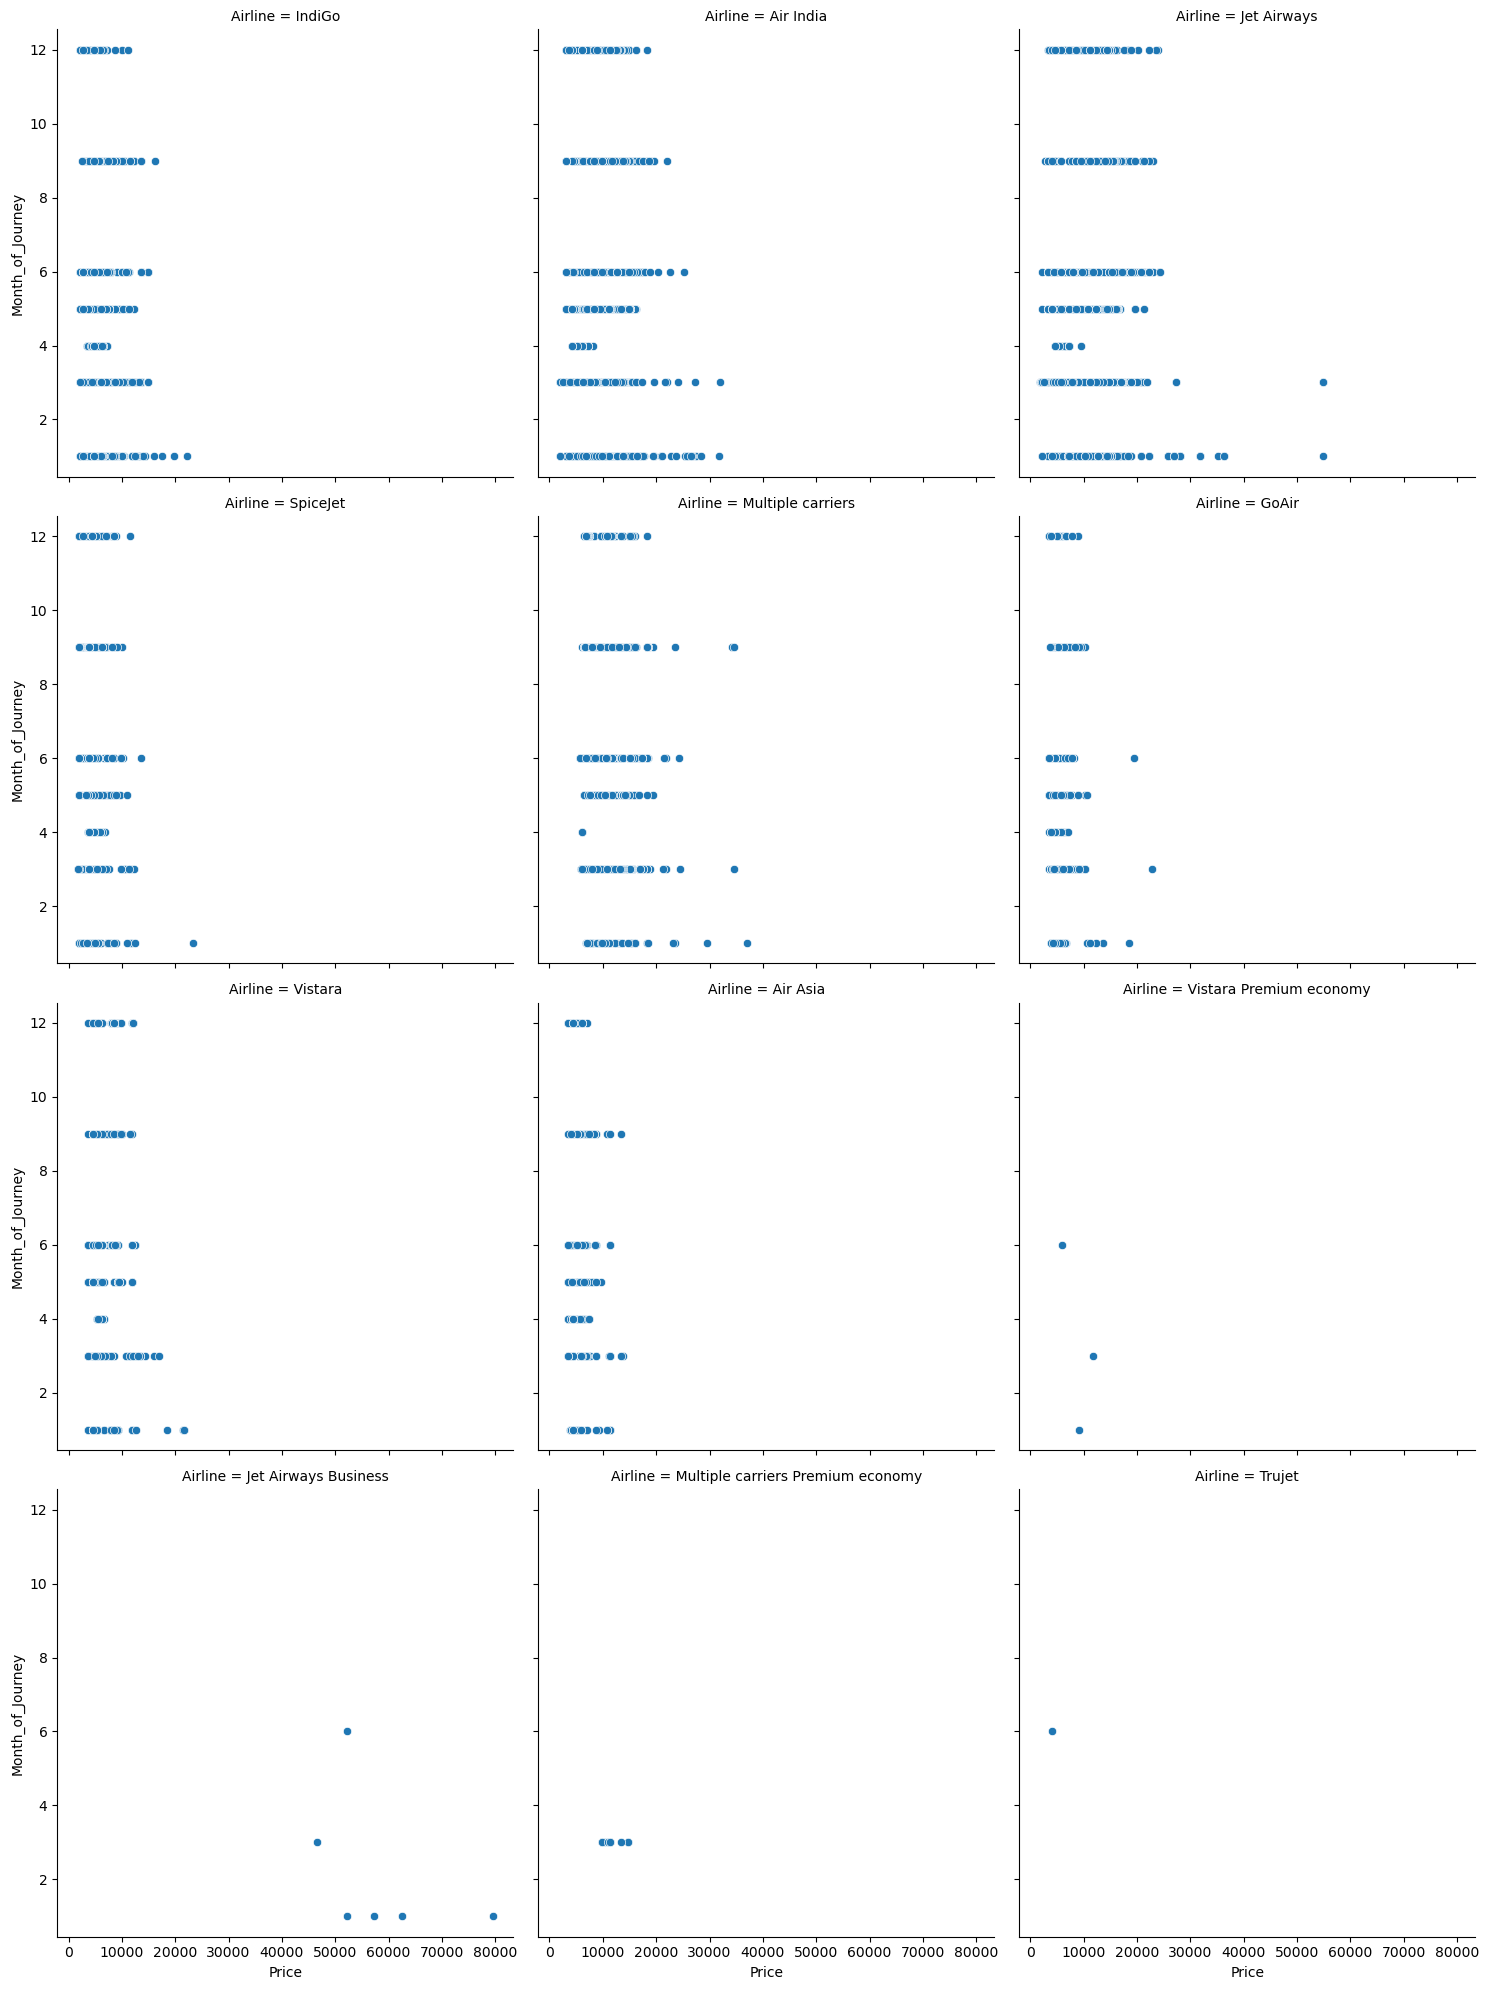

In [55]:
## Scatterplot with (Total_Stops) & (Price ) at each (Airline)
sns.relplot(x='Price', y='Month_of_Journey', data=Air_df, kind='scatter', 
            col='Airline', col_wrap=3)
plt.show()

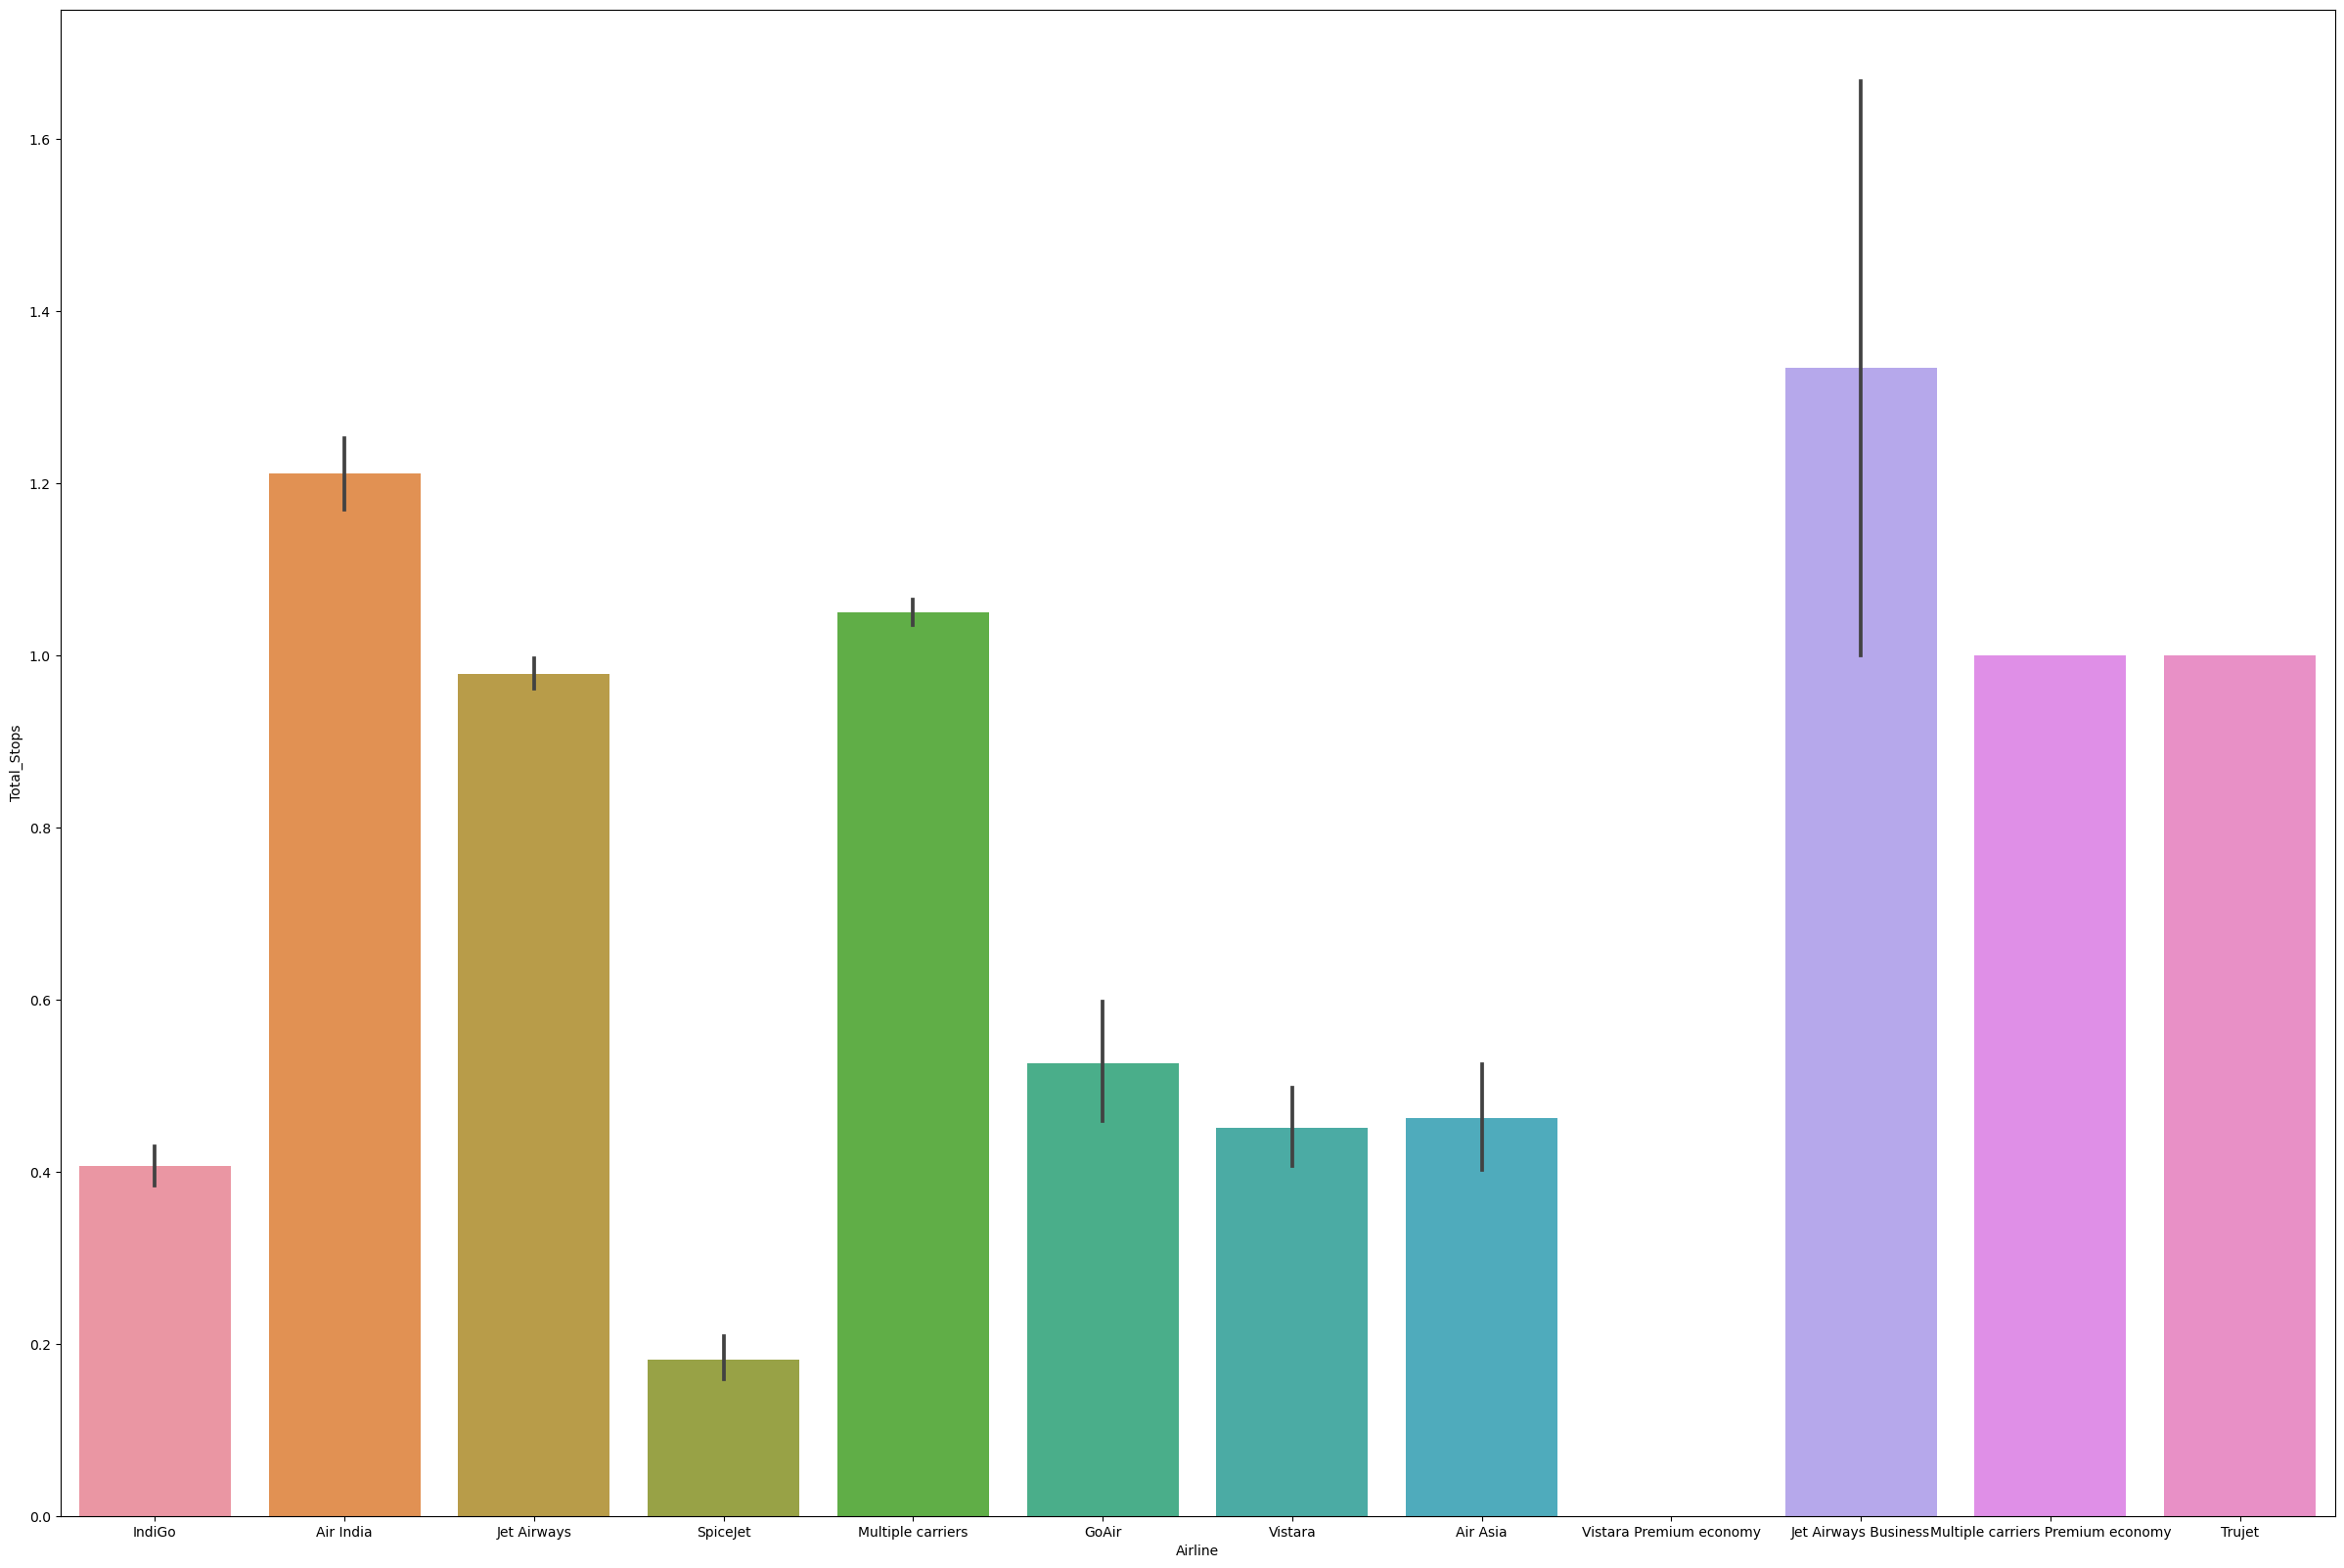

In [56]:
plt.figure(figsize=(30,20))
sns.barplot(y = 'Total_Stops',x = 'Airline',data = Air_df)
plt.show()

In [57]:
####################################################################################

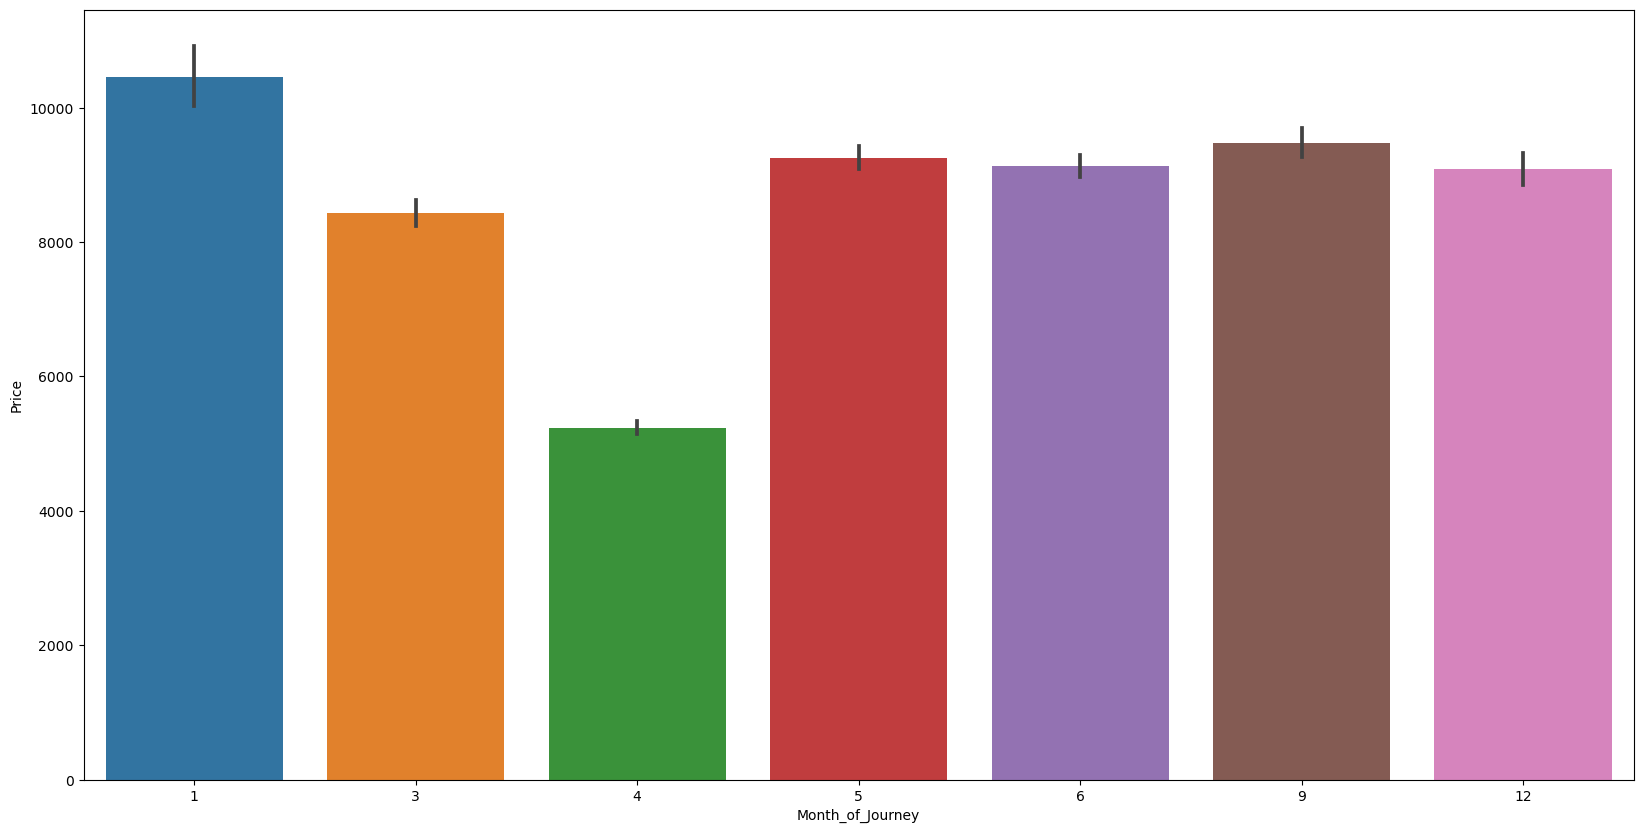

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Month_of_Journey',y = 'Price',data = Air_df)
plt.show()

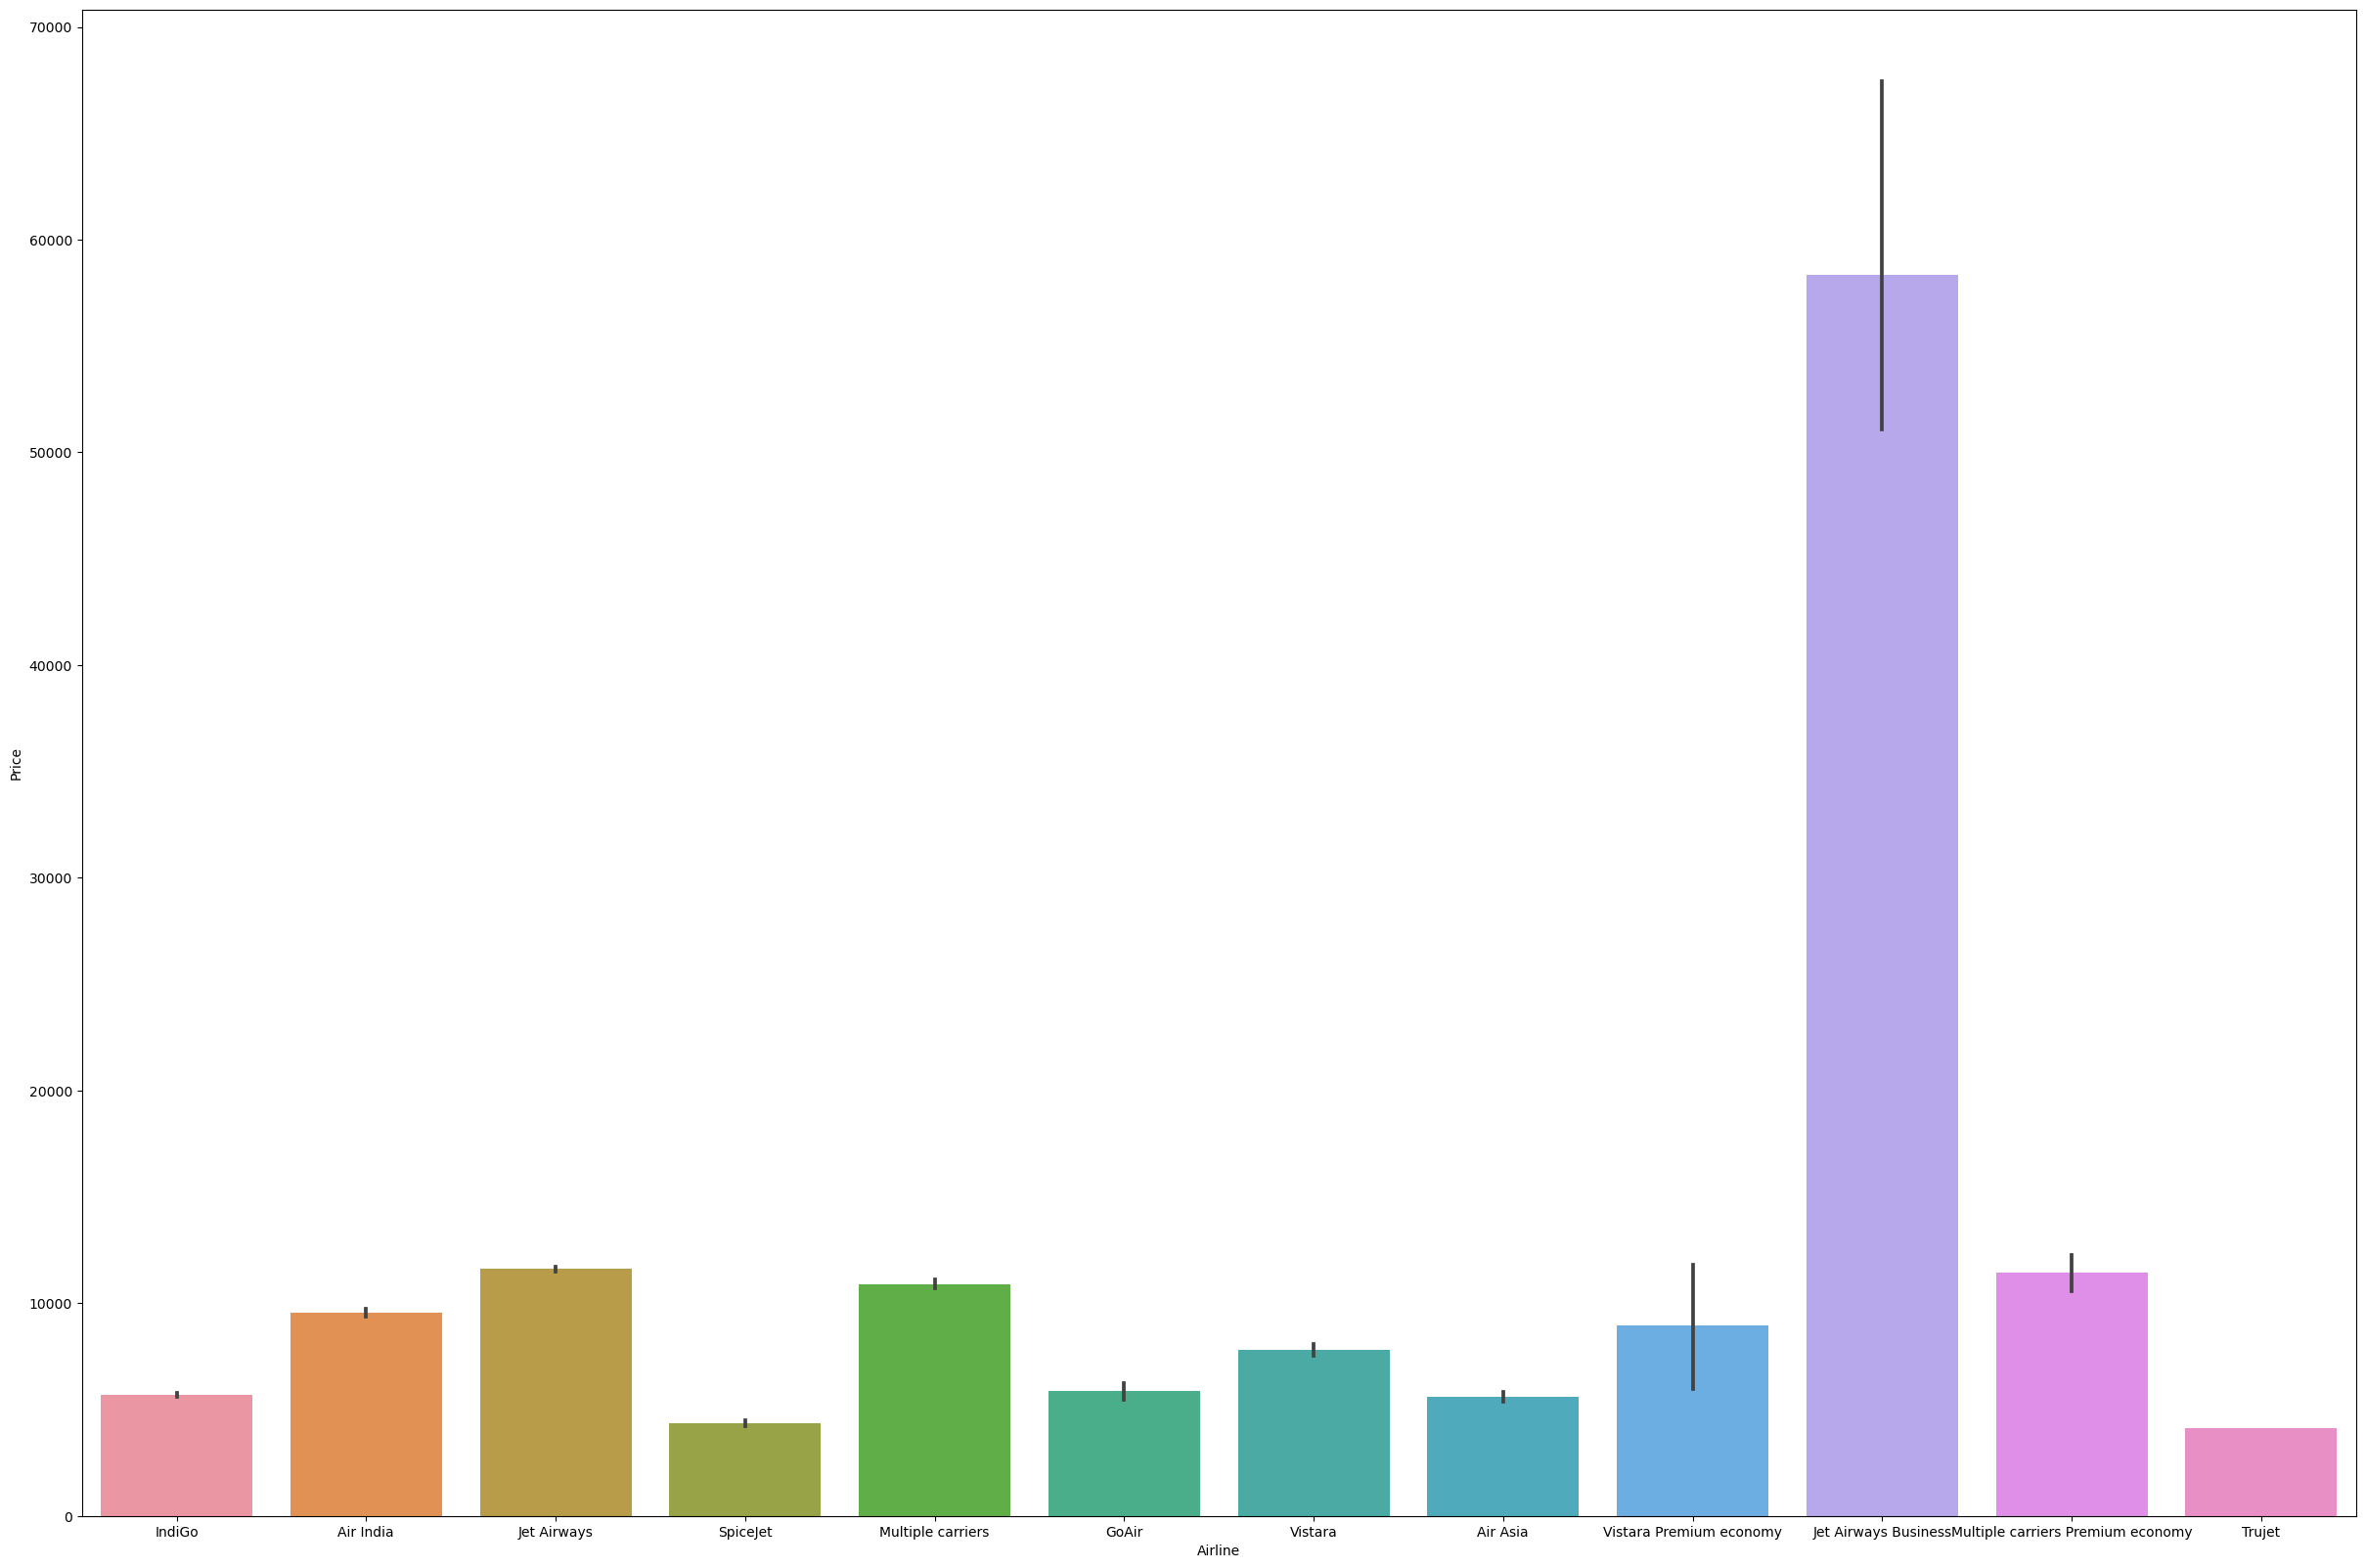

In [59]:
plt.figure(figsize=(30,20))
sns.barplot(y = 'Price',x= 'Airline',data = Air_df)
plt.show()

In [60]:
##jet Airways Business have the most price

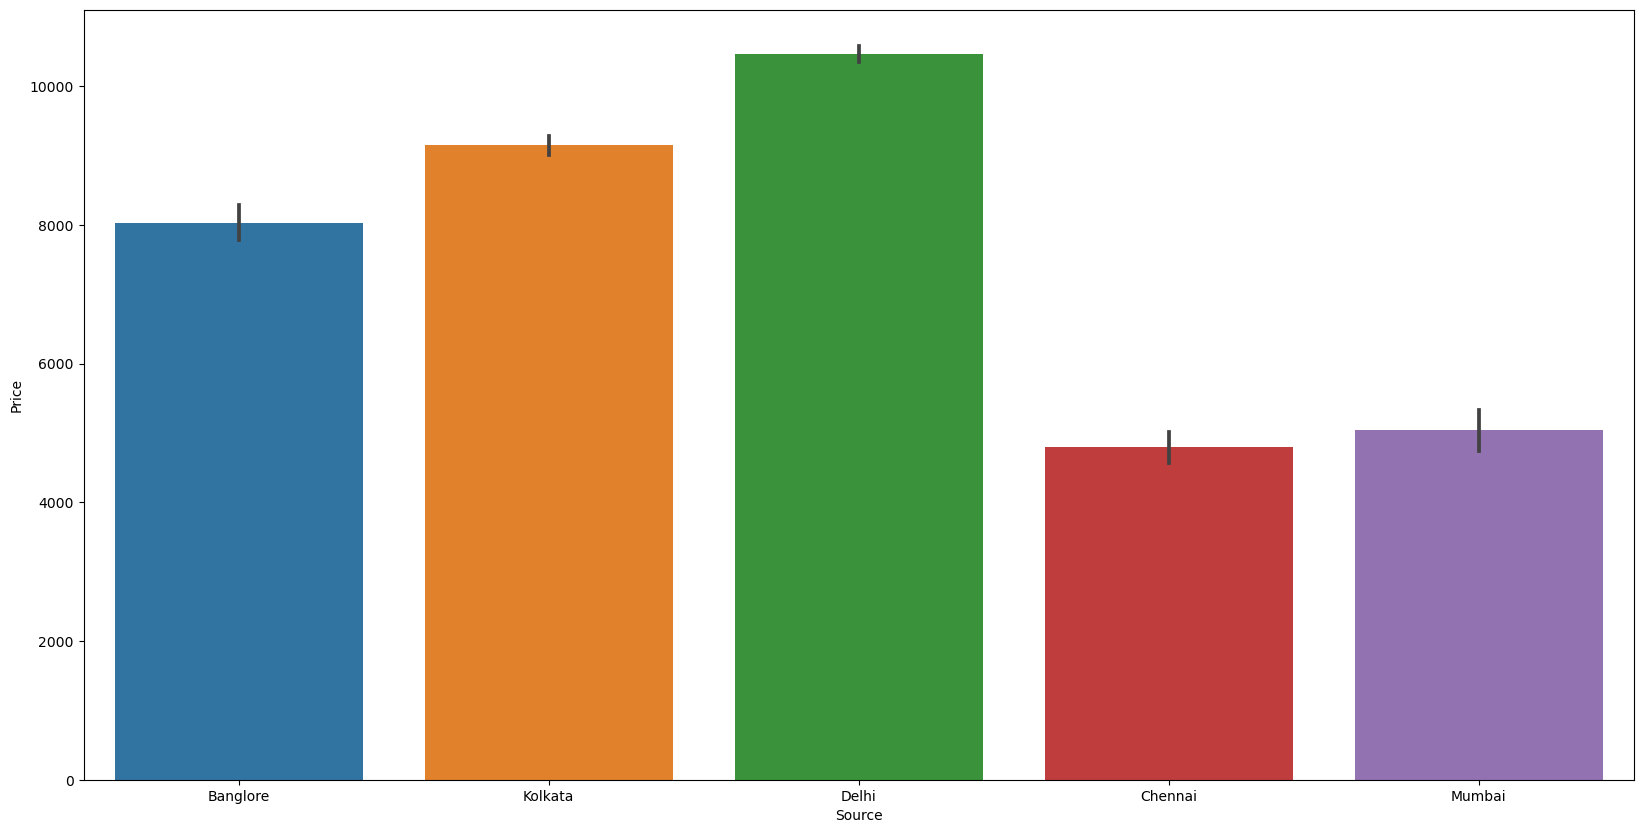

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Source',y = 'Price',data = Air_df)
plt.show()

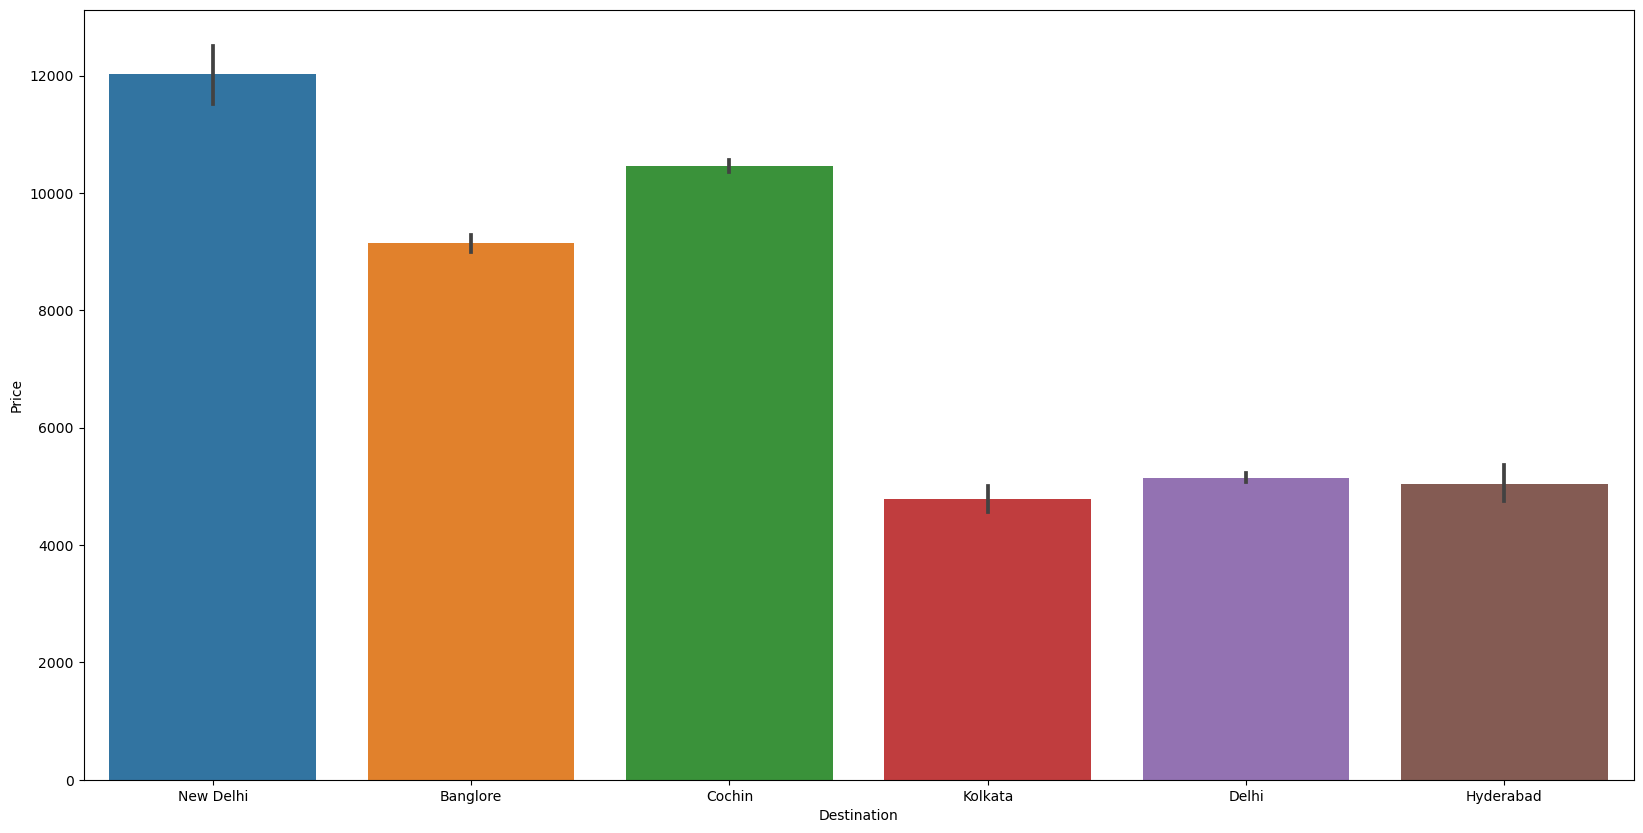

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Destination',y = 'Price',data = Air_df)
plt.show()

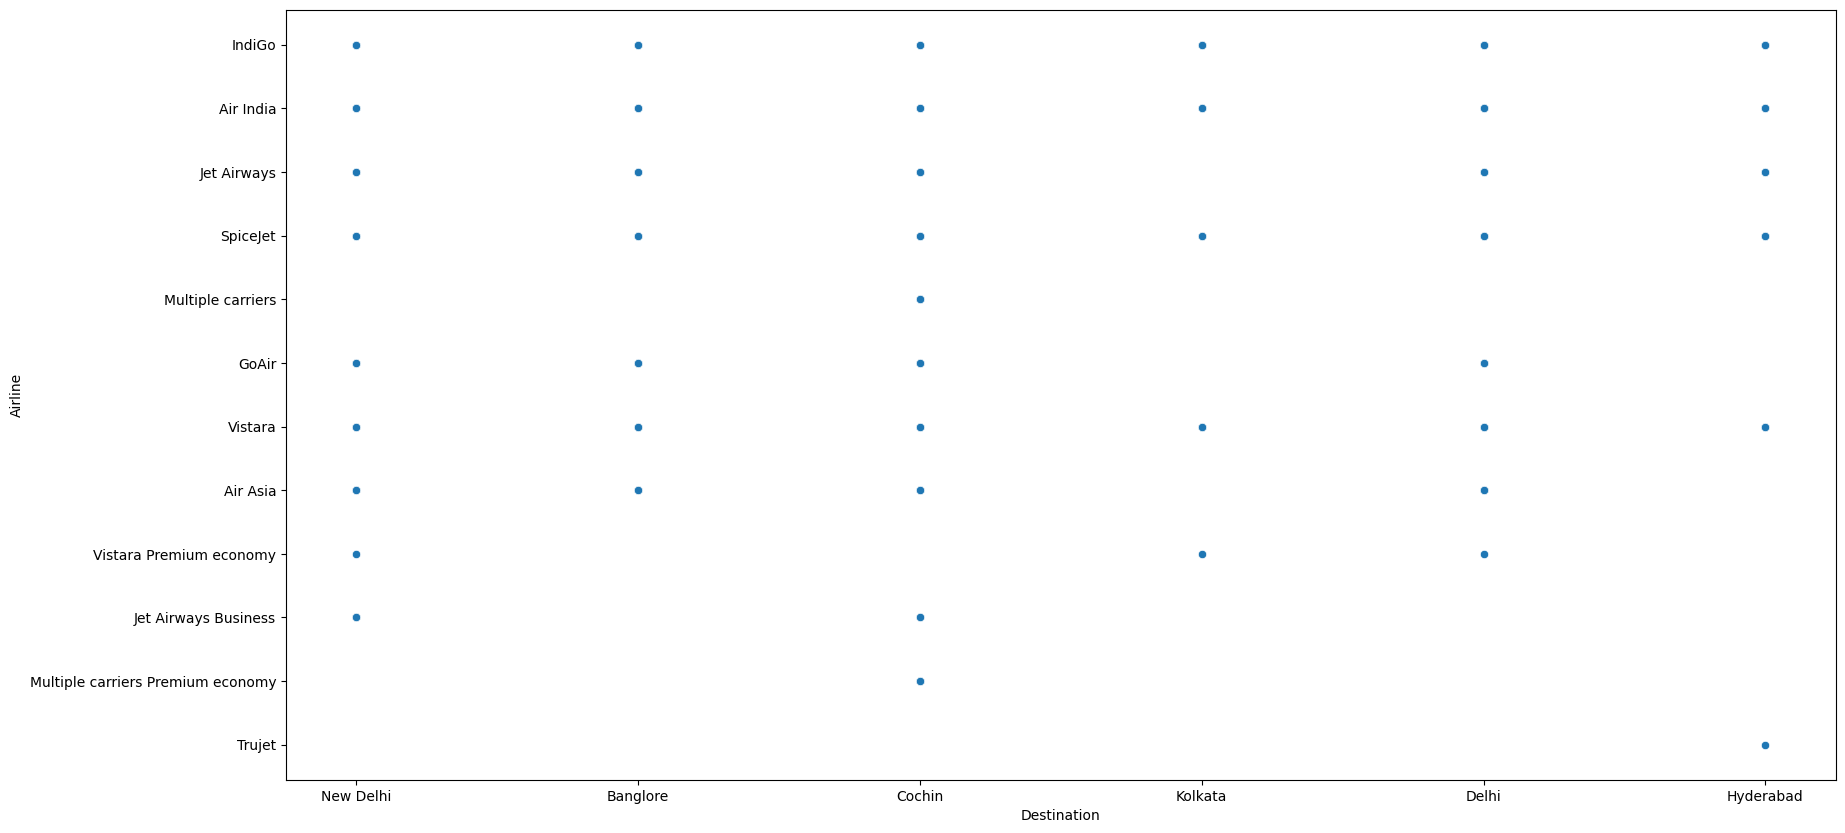

In [63]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Destination',y= 'Airline',data = Air_df)
plt.show()

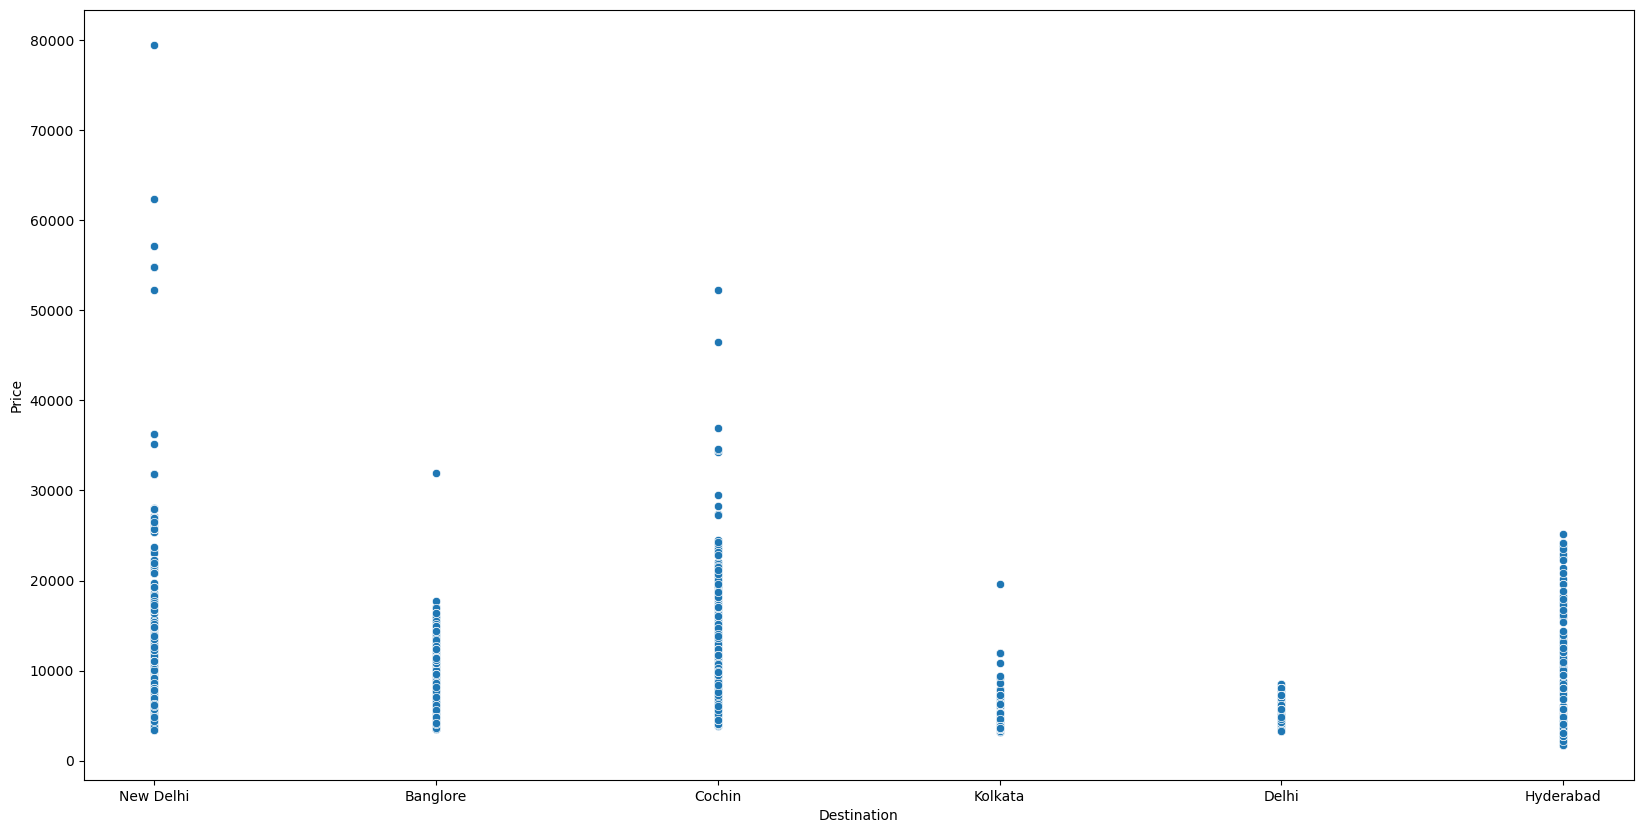

In [64]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Destination',y= 'Price',data = Air_df)
plt.show()

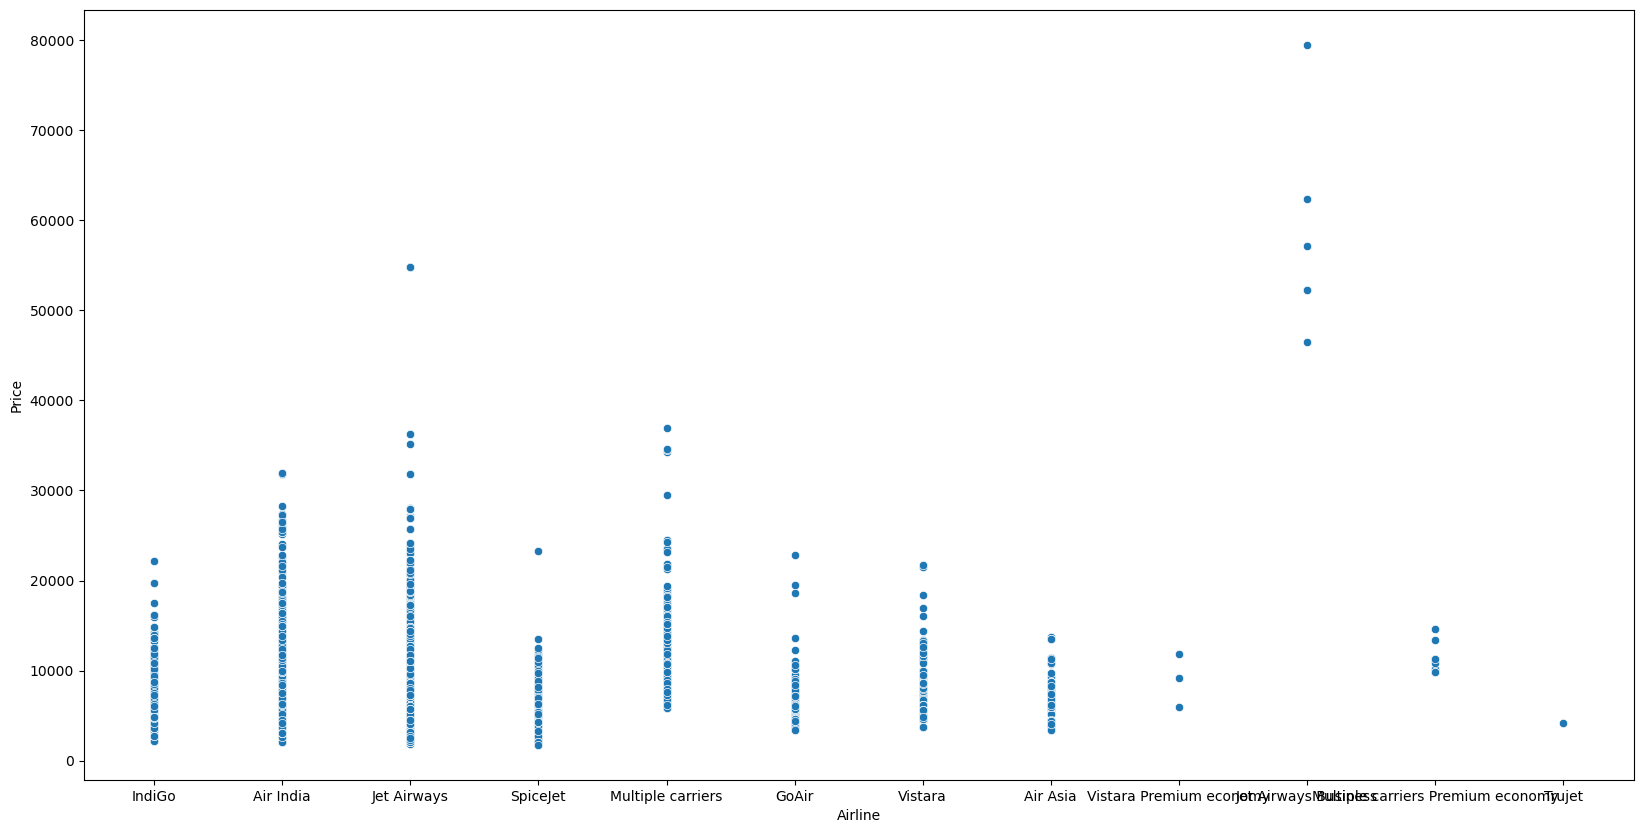

In [65]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Airline',y= 'Price',data = Air_df)
plt.show()

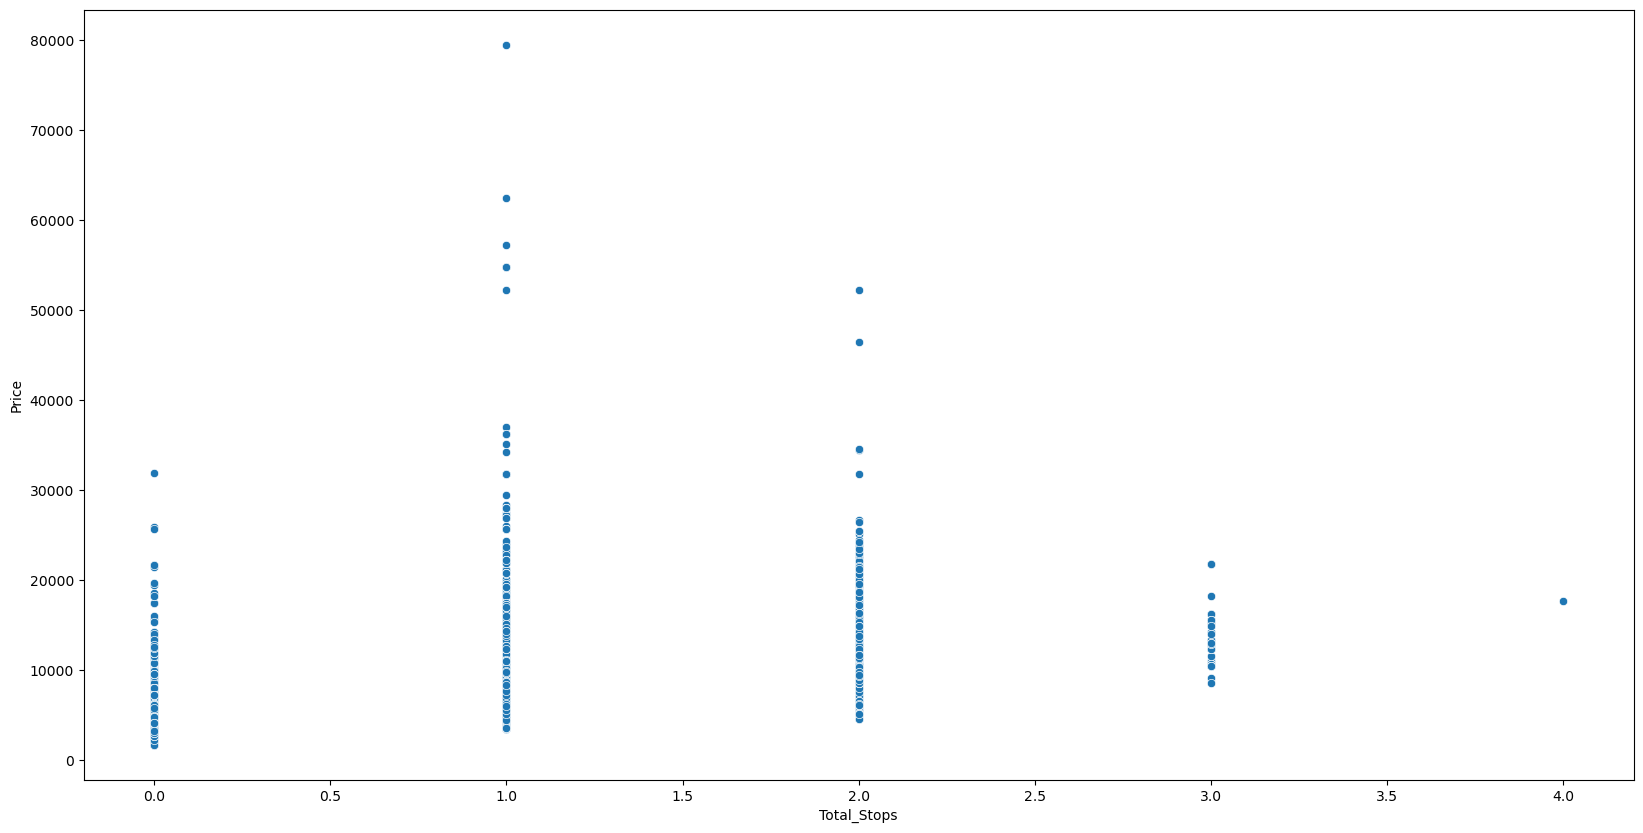

In [66]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Total_Stops',y= 'Price',data = Air_df)
plt.show()

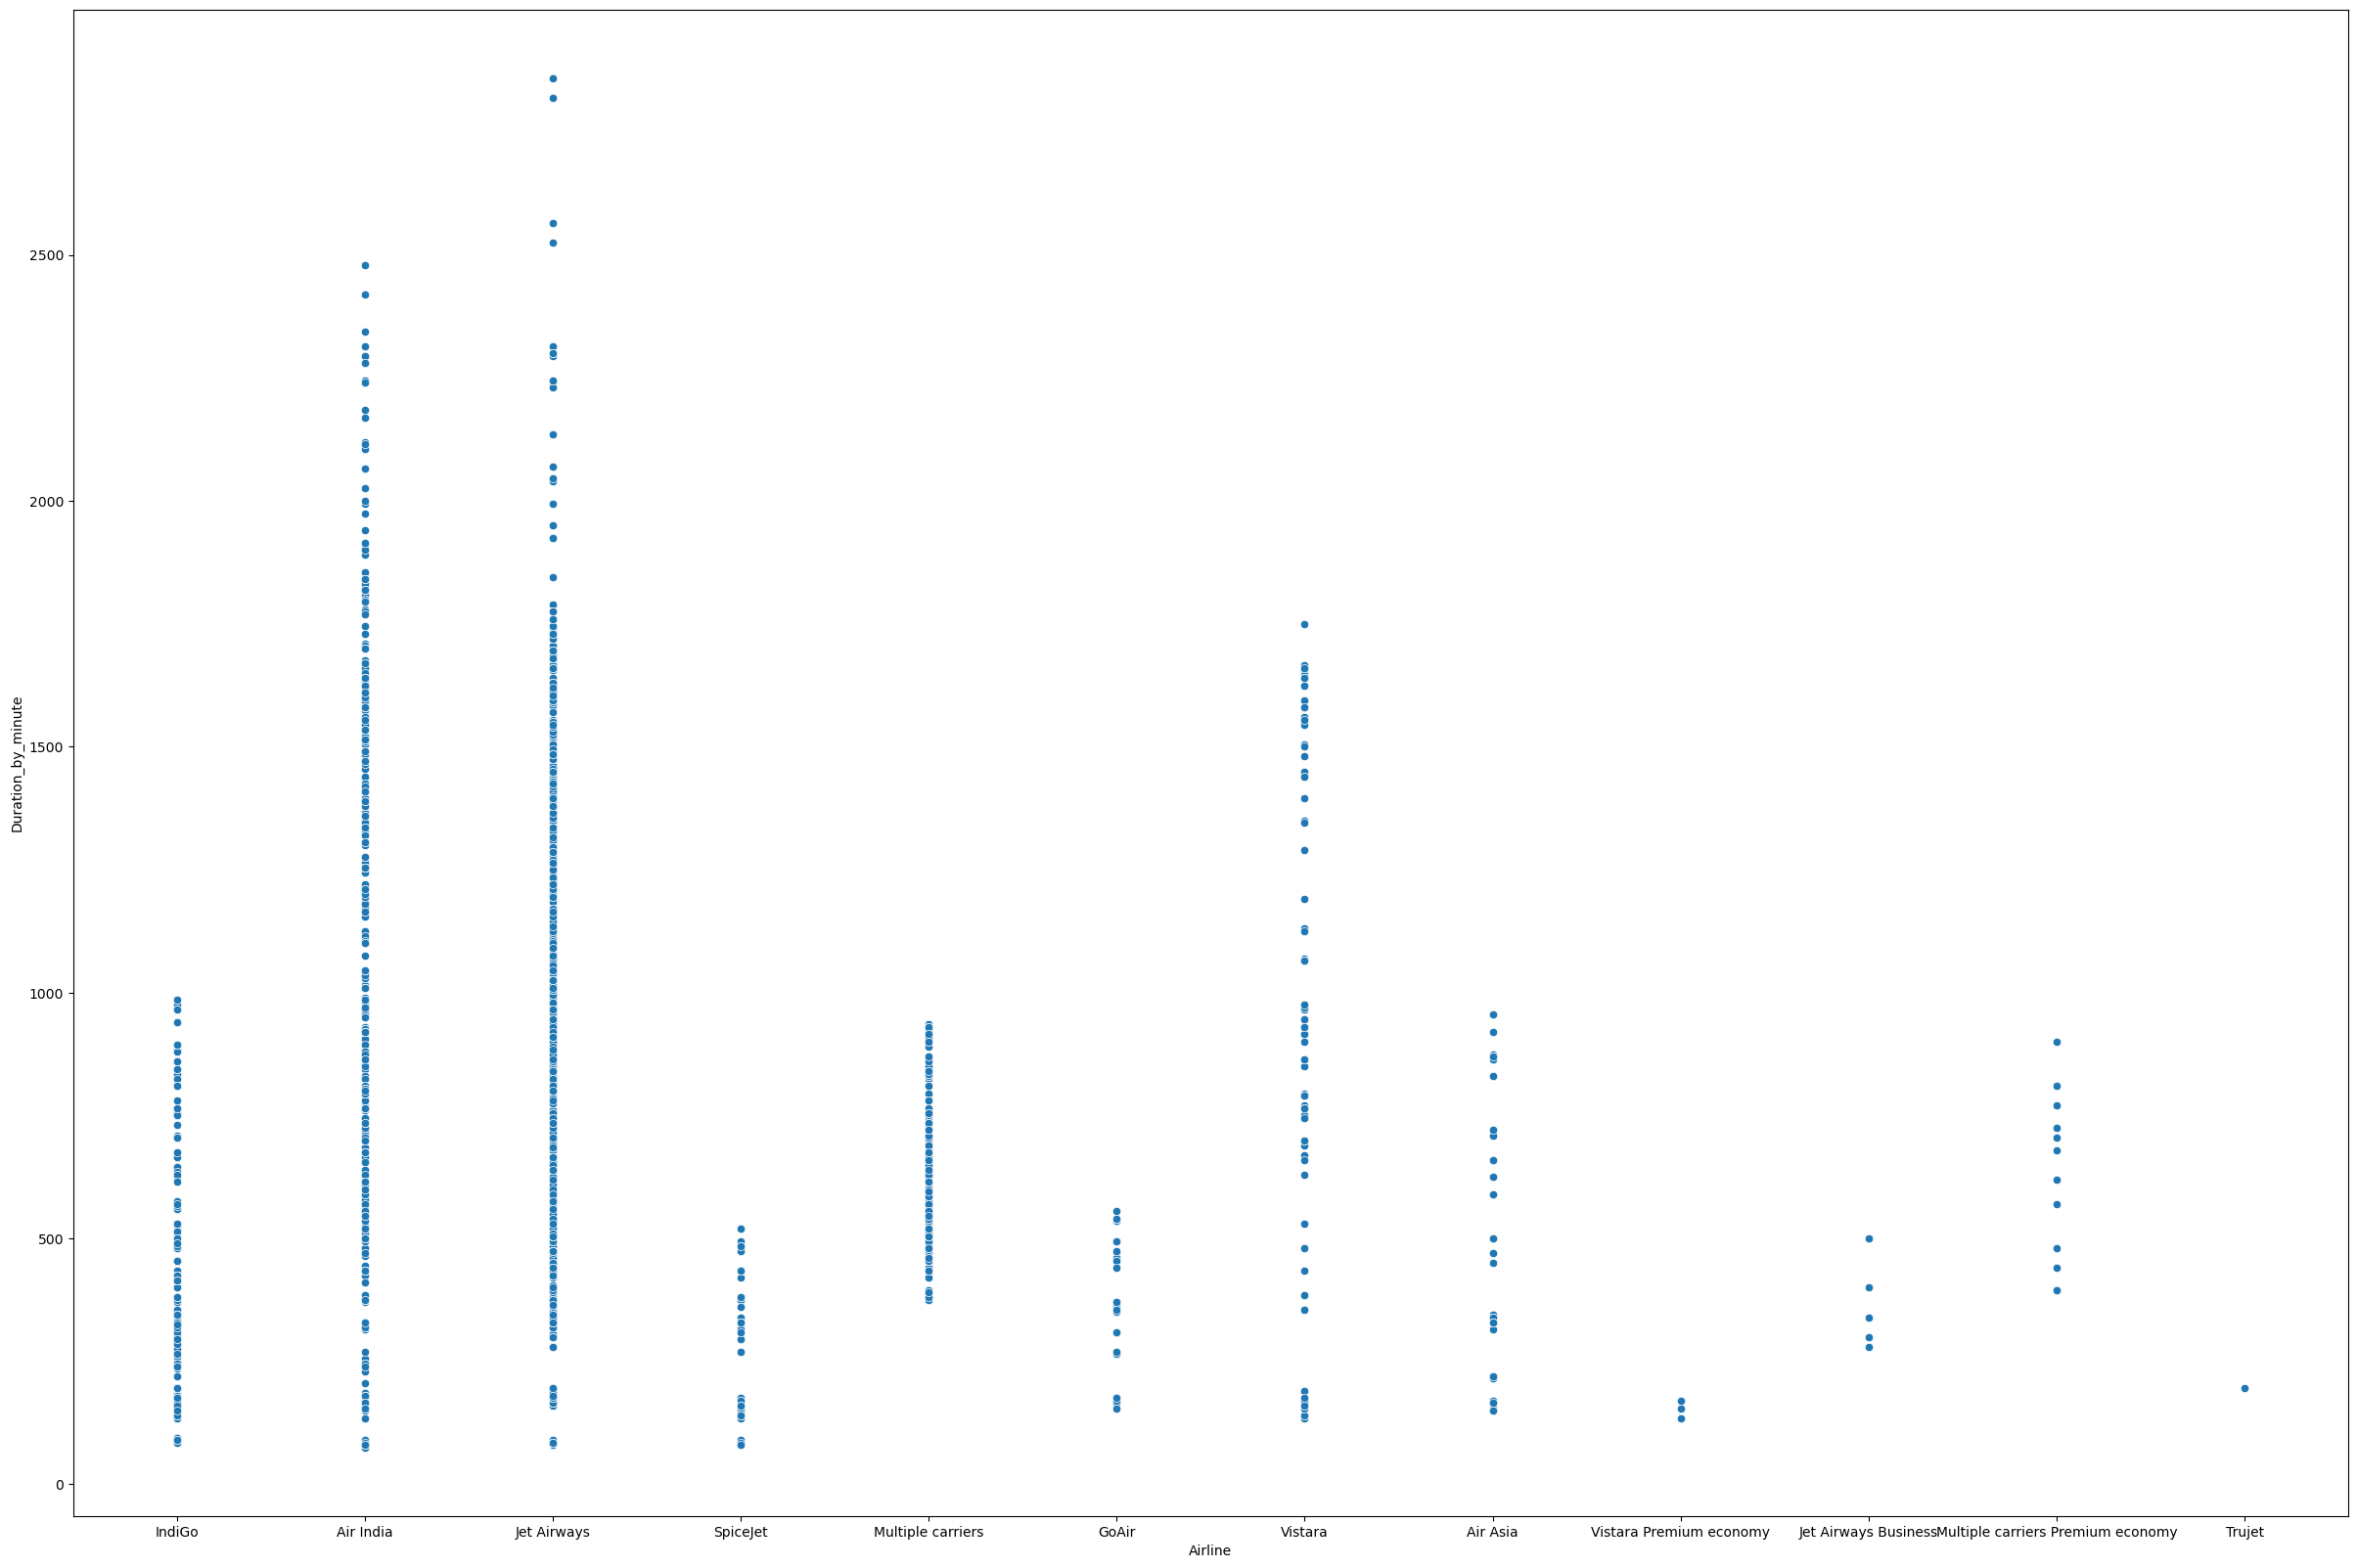

In [67]:
plt.figure(figsize=(30,20))
sns.scatterplot(x = 'Airline',y= 'Duration_by_minute',data = Air_df)
plt.show()

<AxesSubplot:xlabel='Price'>

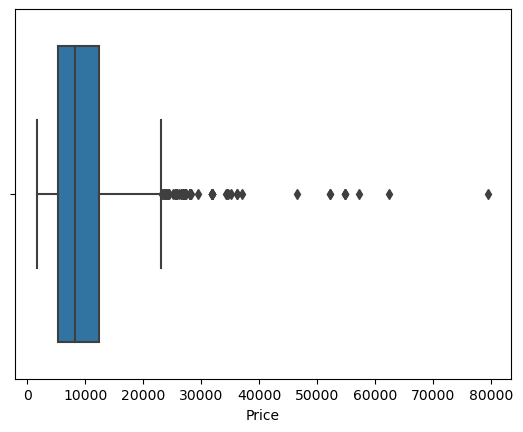

In [68]:
sns.boxplot(Air_df['Price'])

<AxesSubplot:xlabel='Total_Stops'>

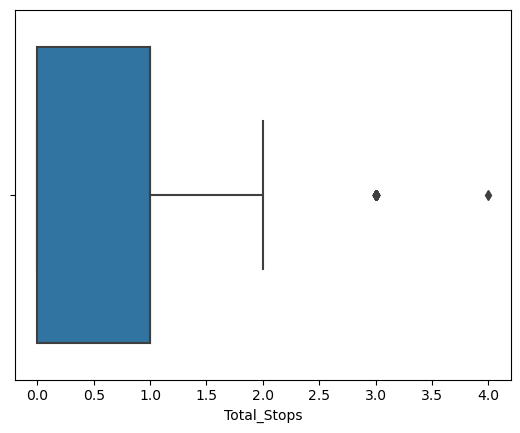

In [69]:
sns.boxplot(Air_df['Total_Stops'])

In [70]:
### There is outliers but i will not Handel The out liers S this is  prices for the air line

In [71]:
Air_df.head()

Airline    Source Destination  Total_Stops Additional_Info  Price  \
0       IndiGo  Banglore   New Delhi            0         No info   3897   
1    Air India   Kolkata    Banglore            2         No info   7662   
2  Jet Airways     Delhi      Cochin            2         No info  13882   
3       IndiGo   Kolkata    Banglore            1         No info   6218   
4       IndiGo  Banglore   New Delhi            1         No info  13302   

   Year_of_Journey  Month_of_Journey  Day_of_Journey  Dep_Hour  Dep_Min  \
0             2019                 3              24        22       20   
1             2019                 1               5         5       50   
2             2019                 9               6         9       25   
3             2019                12               5        18        5   
4             2019                 1               3        16       50   

   Arrival_Hour  Arrival_Min  Duration_Hour  Duration_Minut  \
0             1           10              2              50   
1            13           15              7              25   
2             4           25             19               0   
3            23           30              5              25   
4            21           35              4              45   

   Duration_by_minute  
0                 170  
1                 445  
2                1140  
3                 325  
4                 285

### what are the top 10 expensive Air line in average?

In [72]:
Air_df.groupby("Airline")["Price"].mean().sort_values(ascending = False)

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11599.021081
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9550.795159
Vistara Premium economy               8962.333333
Vistara                               7801.761006
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5593.745283
SpiceJet                              4335.841718
Trujet                                4140.000000
Name: Price, dtype: float64

### what are the most month have highest cost  journy?

In [73]:
Air_df.groupby("Month_of_Journey")["Price"].mean().sort_values(ascending = False)

Month_of_Journey
1     10457.094518
9      9474.560000
5      9253.126914
6      9134.292495
12     9080.340381
3      8428.111214
4      5230.860849
Name: Price, dtype: float64

#### Remove the unnecessary Columns

In [74]:
Air_df.drop(columns=['Duration_Hour','Duration_Minut','Additional_Info','Year_of_Journey',],axis = 1,inplace=True)

### correlation betwen columns

In [75]:
Air_df.corr()['Price'].sort_values(ascending=False)

Price                 1.000000
Total_Stops           0.601848
Duration_by_minute    0.501926
Arrival_Hour          0.030780
Month_of_Journey      0.008528
Dep_Hour              0.005288
Dep_Min              -0.024450
Arrival_Min          -0.086636
Day_of_Journey       -0.170899
Name: Price, dtype: float64

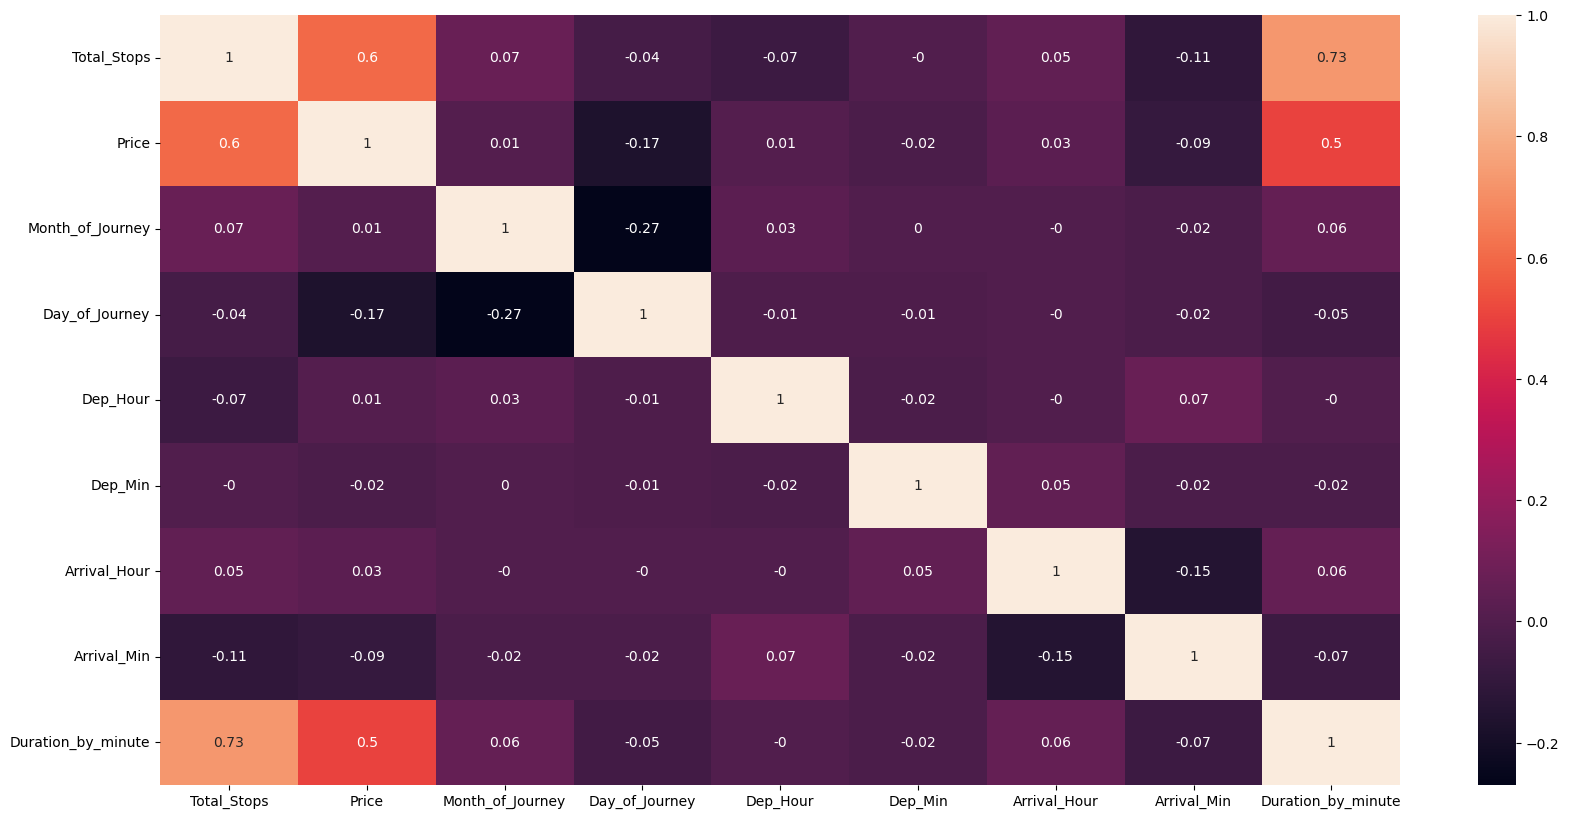

In [76]:
plt.figure(figsize=(20,10))
matrix =Air_df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [77]:
Air_df.head()

Airline    Source Destination  Total_Stops  Price  Month_of_Journey  \
0       IndiGo  Banglore   New Delhi            0   3897                 3   
1    Air India   Kolkata    Banglore            2   7662                 1   
2  Jet Airways     Delhi      Cochin            2  13882                 9   
3       IndiGo   Kolkata    Banglore            1   6218                12   
4       IndiGo  Banglore   New Delhi            1  13302                 1   

   Day_of_Journey  Dep_Hour  Dep_Min  Arrival_Hour  Arrival_Min  \
0              24        22       20             1           10   
1               5         5       50            13           15   
2               6         9       25             4           25   
3               5        18        5            23           30   
4               3        16       50            21           35   

   Duration_by_minute  
0                 170  
1                 445  
2                1140  
3                 325  
4                 285

In [78]:
Air_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Dep_Min',
       'Arrival_Hour', 'Arrival_Min', 'Duration_by_minute'],
      dtype='object')

# we will do Binary Encoding for :
- Airline
- Source
- Destination



In [79]:
Air_df.duplicated().sum()

0

In [80]:
!pip install category_encoders


In [81]:
from category_encoders import BinaryEncoder
Encoder = ColumnTransformer(transformers=[("BE",BinaryEncoder() , ["Airline" , "Source","Destination"] )] , remainder = "passthrough")

In [82]:
Air_df.head()

Airline    Source Destination  Total_Stops  Price  Month_of_Journey  \
0       IndiGo  Banglore   New Delhi            0   3897                 3   
1    Air India   Kolkata    Banglore            2   7662                 1   
2  Jet Airways     Delhi      Cochin            2  13882                 9   
3       IndiGo   Kolkata    Banglore            1   6218                12   
4       IndiGo  Banglore   New Delhi            1  13302                 1   

   Day_of_Journey  Dep_Hour  Dep_Min  Arrival_Hour  Arrival_Min  \
0              24        22       20             1           10   
1               5         5       50            13           15   
2               6         9       25             4           25   
3               5        18        5            23           30   
4               3        16       50            21           35   

   Duration_by_minute  
0                 170  
1                 445  
2                1140  
3                 325  
4                 285

In [83]:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [84]:
models = list()
models.append(("LR" , LinearRegression()))
models.append(("KNN" , KNeighborsRegressor()))
models.append(("RF" , RandomForestRegressor()))
models.append(("XG" , XGBRegressor()))
models.append(("DT" , DecisionTreeRegressor()))

In [85]:
x = Air_df.drop(columns=["Price"],axis = 1)
y = Air_df["Price"]

In [86]:
for model in models:
    steps = []
    steps.append(("Encoder" ,Encoder))
    steps.append(("Scaler" ,RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    scores = cross_validate(pipeline,x,y, cv =5, scoring="r2" , return_train_score=True,)
    print(model[0])
    print("Train_r2" ,  scores["train_score"].mean())
    print("-" * 10)
    print("Test_r2" ,  scores["test_score"].mean())
    print("-" * 20)
    print("\n")

LR
Train_r2 0.5233274262809938
----------
Test_r2 0.5221916284334668
--------------------


KNN
Train_r2 0.8133400503555439
----------
Test_r2 0.7115908247114915
--------------------


RF
Train_r2 0.9510531979693049
----------
Test_r2 0.7805157889757304
--------------------


XG
Train_r2 0.938947035409052
----------
Test_r2 0.8255656806115583
--------------------


DT
Train_r2 0.9705320419209531
----------
Test_r2 0.6597271747311104
--------------------




In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
 XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [89]:
params = {
    'Model__learning_rate': [0.01, 0.1, 0.2], 
    'Model__n_estimators': [110,120,130],  # Number of trees (boosting rounds)
    'Model__reg_alpha':  [0, 0.1, 0.5]

}




In [90]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" ,  XGBRegressor()))
pipeline = Pipeline(steps=steps)

In [91]:
grid_search = GridSearchCV(estimator=pipeline , param_grid=params, cv =5 ,scoring="r2" , return_train_score=True , n_jobs = -1)
grid_search.fit(x,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('BE',
                                                                         BinaryEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination'])])),
                                       ('Scaler', RobustScaler()),
                                       ('Model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_roun...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'Model__learning_rate': [0.01, 0.1, 0.2],
                         'Model__n_estimators': [110, 120, 130],
                         'Model__reg_alpha': [0, 0.1, 0.5]},
             return_train_score=True, scoring='r2')

In [92]:
grid_search.best_params_

{'Model__learning_rate': 0.1,
 'Model__n_estimators': 130,
 'Model__reg_alpha': 0.5}

In [93]:
grid_search.cv_results_["mean_train_score"].mean()

0.7309961335266125

In [94]:
grid_search.cv_results_["mean_test_score"].mean()

0.6568499908968486

In [95]:
final_model = grid_search.best_estimator_

In [96]:
import joblib

In [97]:
joblib.dump(final_model , "Model.pkl")
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [98]:
x

Airline    Source Destination  Total_Stops  Month_of_Journey  \
0           IndiGo  Banglore   New Delhi            0                 3   
1        Air India   Kolkata    Banglore            2                 1   
2      Jet Airways     Delhi      Cochin            2                 9   
3           IndiGo   Kolkata    Banglore            1                12   
4           IndiGo  Banglore   New Delhi            1                 1   
...            ...       ...         ...          ...               ...   
10678     Air Asia   Kolkata    Banglore            0                 9   
10679    Air India   Kolkata    Banglore            0                 4   
10680  Jet Airways  Banglore       Delhi            0                 4   
10681      Vistara  Banglore   New Delhi            0                 1   
10682    Air India     Delhi      Cochin            2                 9   

       Day_of_Journey  Dep_Hour  Dep_Min  Arrival_Hour  Arrival_Min  \
0                  24        22       20             1           10   
1                   5         5       50            13           15   
2                   6         9       25             4           25   
3                   5        18        5            23           30   
4                   3        16       50            21           35   
...               ...       ...      ...           ...          ...   
10678               4        19       55            22           25   
10679              27        20       45            23           20   
10680              27         8       20            11           20   
10681               3        11       30            14           10   
10682               5        10       55            19           15   

       Duration_by_minute  
0                     170  
1                     445  
2                    1140  
3                     325  
4                     285  
...                   ...  
10678                 150  
10679                 155  
10680                 180  
10681                 160  
10682                 500  

[10460 rows x 11 columns]

In [99]:
final_model.predict

<bound method Pipeline.predict of Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BE', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=F...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
           

In [100]:
x.sample(1)

Airline   Source Destination  Total_Stops  Month_of_Journey  \
6639  IndiGo  Kolkata    Banglore            1                 4   

      Day_of_Journey  Dep_Hour  Dep_Min  Arrival_Hour  Arrival_Min  \
6639              24        19       20            23           45   

      Duration_by_minute  
6639                 265

In [101]:
final_model.predict(x.sample(1))[0]

12392.163

In [102]:
x["Duration_by_minute" ].unique().min()

75

In [103]:
x["Duration_by_minute" ].unique().max()

2860

In [104]:
!pip install streamlit

In [105]:
%%writefile streamlit_app_3rd.py
import streamlit as st
import pandas as pd
import joblib
from category_encoders import BinaryEncoder
import sklearn
from xgboost import XGBRegressor


Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")

def prediction(Total_Stops, Month_of_Journey, Day_of_Journey, Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_by_minute,AirLine,Source,Destination):
    test_df = pd.DataFrame(columns=Inputs)
    test_df.at[0,"Total_Stops"] = Total_Stops
    test_df.at[0,"Month_of_Journey"] = Month_of_Journey
    test_df.at[0,"Day_of_Journey"] = Day_of_Journey
    test_df.at[0,"Dep_Hour"] = Dep_Hour
    test_df.at[0,"Dep_Min"] = Dep_Min
    test_df.at[0,"Arrival_Hour"] = Arrival_Hour
    test_df.at[0,"Arrival_Min"] = Arrival_Min
    test_df.at[0,"Duration_by_minute"] = Duration_by_minute
    test_df.at[0,"AirLine"] = AirLine
    test_df.at[0,"Source"] = Source
    test_df.at[0,"Destination"] = Destination
    st.dataframe(test_df)
    result = Model.predict(test_df)[0]
    return result



def main():
    st.title("Bangolre Airlines")
    Total_Stops = st.selectbox("Total_Stops" , [0, 1, 2, 3, 4])
    Month_of_Journey = st.selectbox("Month_of_Journey" , [1,2,3,4,5,6,7,8,9,10,11,12])
    Day_of_Journey = st.selectbox("Day_of_Journey" , [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
    Dep_Hour = st.selectbox("Dep_Hour" , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    Dep_Min = st.selectbox("Dep_Min" ,[0,5,10,15,20,25,30,35,40,45,50,55,60])
    Arrival_Hour = st.slider("Arrival_Hour" , min_value=1, max_value=24, value=0, step=1)
    Arrival_Min = st.slider("Arrival_Min" , min_value=1, max_value=60, value=0, step=1)
    Duration_by_minute = st.slider("Duration_by_minute" , min_value=75, max_value=2860, value=0, step=1)
    AirLine = st.selectbox("AirLine" , ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'])
    Source = st.selectbox("Source" , ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'])
    Destination = st.selectbox("Destination" , ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'])
    
    if st.button("predict"):
        result = prediction(Total_Stops, Month_of_Journey, Day_of_Journey, Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_by_minute,AirLine,Source,Destination)
        label = ["0"]
        st.text(f"The Price will {result}")
        
if __name__ == '__main__':
    main()    
    

Overwriting streamlit_app_3rd.py
